#  Project 5 - Client Segmentation for Olist

## Project Objectives

- Create a segmentation of clients that Olist can use in its communication campaigns
- Provide an actionable description of client segmentation
- Suggest a maintenance contract for the clusters

Data: https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_order_items_dataset.csv <br>
Assignment: https://openclassrooms.com/fr/projects/630/assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
#Set up environment
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = [14, 6]

In [3]:
#Import datasets
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_payment = pd.read_csv('olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_customer = pd.read_csv('olist_customers_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_seller = pd.read_csv('olist_sellers_dataset.csv')
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_prod_trans = pd.read_csv('product_category_name_translation.csv')

In [4]:
#Make dictionary of data frames
df_dict = {'df_orders': df_orders, 
           'df_items': df_items, 
           'df_payment': df_payment, 
           'df_reviews': df_reviews, 
           'df_customer': df_customer, 
           'df_products': df_products, 
           'df_seller': df_seller, 
           'df_geo': df_geo, 
           'df_prod_trans': df_prod_trans}

### Data Overview

In [5]:
df_orders.head(10)

#Order Purchase --> Customer orders online
#Order Approved --> Payment accepted
#Order Delivered Carrier --> Goods delivered to carrier
#Order Delivered Customer --> Goods delivered to customer
#Order Estimated Delivery --> Estimate date of delivery to customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [6]:
df_items.head(10)

#Shipping Limit Date --> Shows the seller shipping limit date for handling the order over to the logistic partner.

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [7]:
df_payment.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [8]:
df_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [9]:
df_customer.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [10]:
df_products.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [11]:
df_seller.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [12]:
df_geo.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [13]:
df_prod_trans.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [14]:
#Check number of rows in each dataset to check that they make sense
for i in df_dict.keys():
    print(i + ': ' + str(len(df_dict[i])) + ' rows')

df_orders: 99441 rows
df_items: 112650 rows
df_payment: 103886 rows
df_reviews: 100000 rows
df_customer: 99441 rows
df_products: 32951 rows
df_seller: 3095 rows
df_geo: 1000163 rows
df_prod_trans: 71 rows


### Duplicate Issues
We want to deal with issues of duplicates before joining the data, this can be done by checking Primary Keys for each table and ensuring that there are no duplicates

In [15]:
#Orders --> Primary Key = order_id
print(len(df_orders))
print(len(df_orders['order_id'].unique()))

99441
99441


In [16]:
#Items --> Primary Key = order_id AND order_item_id
df_items['PK'] = df_items['order_id'] + '_' + df_items['order_item_id'].apply(str) #Create Primary Key column
print(len(df_items))
print(len(df_items['PK'].unique()))

112650
112650


In [17]:
#Payment --> Primary Key = order_id AND payment_sequential, where Payment Sequential is the number of different payments undertaken to fully pay for the order
df_payment['PK'] = df_payment['order_id'] + '_' + df_payment['payment_sequential'].apply(str) #Create Primary Key column
print(len(df_payment))
print(len(df_payment['PK'].unique()))

103886
103886


In [18]:
#Reviews --> Primary Key = review_id and order_id
df_reviews['PK'] = df_reviews['review_id'] + '_' + df_reviews['order_id'] #Create Primary Key column
print(len(df_reviews))
print(len(df_reviews['PK'].unique()))

100000
100000


In [19]:
#Customer --> Primary Key = customer_id
print(len(df_customer))
print(len(df_customer['customer_id'].unique()))

99441
99441


In [20]:
#Products --> Primary Key = product_id
print(len(df_products))
print(len(df_products['product_id'].unique()))

32951
32951


In [21]:
#Seller --> Primary Key = seller_id
print(len(df_seller))
print(len(df_seller['seller_id'].unique()))

3095
3095


In [22]:
#Geo --> Primary Key = Zip Code?
print(len(df_geo))
print(len(df_geo['geolocation_zip_code_prefix'].unique()))

1000163
19015


There are duplicates in the Geo table, let's look into this

In [23]:
df_geo.head(20)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [24]:
#We see that there are duplicate Zip codes with multiple geo locations,
#presumably linking to the geo coordinates of different customers that have made orders from that zip code
df_geo[df_geo['geolocation_zip_code_prefix'] == 1046]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP
19,1046,-23.545884,-46.643163,sao paulo,SP
20,1046,-23.545166,-46.643786,sao paulo,SP
...,...,...,...,...,...
1432,1046,-23.545166,-46.643786,sao paulo,SP
1437,1046,-23.547191,-46.642923,sao paulo,SP
1439,1046,-23.545158,-46.643880,sao paulo,SP
1450,1046,-23.545292,-46.643130,sao paulo,SP


In [25]:
#This will cause our dataset to explode if we don't resolve it, let's make a new dataset where we take the median latitude and longitude of each zip code
#We can drop the city and state as these are already included in the customer dataset

df_geo_agg = df_geo.pivot_table(['geolocation_lat', 'geolocation_lng'], index = 'geolocation_zip_code_prefix', aggfunc = 'median').reset_index()

In [26]:
df_geo_agg

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550381,-46.634027
1,1002,-23.548551,-46.635072
2,1003,-23.548977,-46.635313
3,1004,-23.549535,-46.634771
4,1005,-23.549612,-46.636532
...,...,...,...
19010,99960,-27.953797,-52.029641
19011,99965,-28.179542,-52.035551
19012,99970,-28.343273,-51.873734
19013,99980,-28.388092,-51.846880


### Join Dataset

Below is a diagram of how the data should be linked together

<img src="Data Structure.png" style="width: 800px;">

In [27]:
#Merge Orders with Customer
df = pd.merge(df_orders, df_customer, left_on = 'customer_id', right_on = 'customer_id', how = 'left')

In [28]:
#Checking length of data frame
len(df)

99441

In [29]:
#Merge with Reviews
df = pd.merge(df, df_reviews, left_on = 'order_id', right_on = 'order_id', how = 'left')

In [30]:
#Checking length of data frame
len(df)

100000

In [31]:
#Merge with Reviews
df = pd.merge(df, df_payment, left_on = 'order_id', right_on = 'order_id', how = 'left')

In [32]:
len(df)

104486

In [33]:
#Merge with Items
df = pd.merge(df, df_items, left_on = 'order_id', right_on = 'order_id', how = 'left')

In [34]:
len(df)

119151

In [35]:
#Merge with Products
df = pd.merge(df, df_products, left_on = 'product_id', right_on = 'product_id', how = 'left')

In [36]:
len(df)

119151

In [37]:
#Merge with Sellers
df = pd.merge(df, df_seller, left_on = 'seller_id', right_on = 'seller_id', how = 'left')

In [38]:
len(df)

119151

In [39]:
#Merge Customer with Geo
df = pd.merge(df, df_geo_agg, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left')

In [40]:
len(df)

119151

In [41]:
#Merge Seller with Geo
df = pd.merge(df, df_geo_agg, left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left')

In [42]:
len(df)

119151

In [43]:
#Merge English Product Name
df = pd.merge(df, df_prod_trans, left_on = 'product_category_name', right_on = 'product_category_name', how = 'left')

In [44]:
df.rename(columns={"geolocation_zip_code_prefix_x": "customer_zip_code", 
                   "geolocation_lat_x": "customer_lat", 
                   "geolocation_lng_x": "customer_lng", 
                   "geolocation_zip_code_prefix_y": "seller_zip_code", 
                   "geolocation_lat_y": "seller_lat", 
                   "geolocation_lng_y": "seller_lng"},
         inplace = True)

In [45]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,PK_x,payment_sequential,payment_type,payment_installments,payment_value,PK_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,PK,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code,customer_lat,customer_lng,seller_zip_code,seller_lat,seller_lng,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,a54f0611adc9ed256b57ede6b6eb5114_e481f51cbdc54...,1.0,credit_card,1.0,18.12,e481f51cbdc54678b7cc49136f2d6af7_1,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,e481f51cbdc54678b7cc49136f2d6af7_1,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3149.0,-23.576170,-46.587276,9350.0,-23.681180,-46.444127,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,a54f0611adc9ed256b57ede6b6eb5114_e481f51cbdc54...,3.0,voucher,1.0,2.00,e481f51cbdc54678b7cc49136f2d6af7_3,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,e481f51cbdc54678b7cc49136f2d6af7_1,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3149.0,-23.576170,-46.587276,9350.0,-23.681180,-46.444127,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,a54f0611adc9ed256b57ede6b6eb5114_e481f51cbdc54...,2.0,voucher,1.0,18.59,e481f51cbdc54678b7cc49136f2d6af7_2,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,e481f51cbdc54678b7cc49136f2d6af7_1,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3149.0,-23.576170,-46.587276,9350.0,-23.681180,-46.444127,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,8d5266042046a06655c8db133d120ba5_53cdb2fc8bc7d...,1.0,boleto,1.0,141.46,53cdb2fc8bc7dce0b6741e2150273451_1,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,53cdb2fc8bc7dce0b6741e2150273451_1,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,47813.0,-12.126651,-45.008162,31570.0,-19.807013,-43.980966,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e

## Data Cleaning

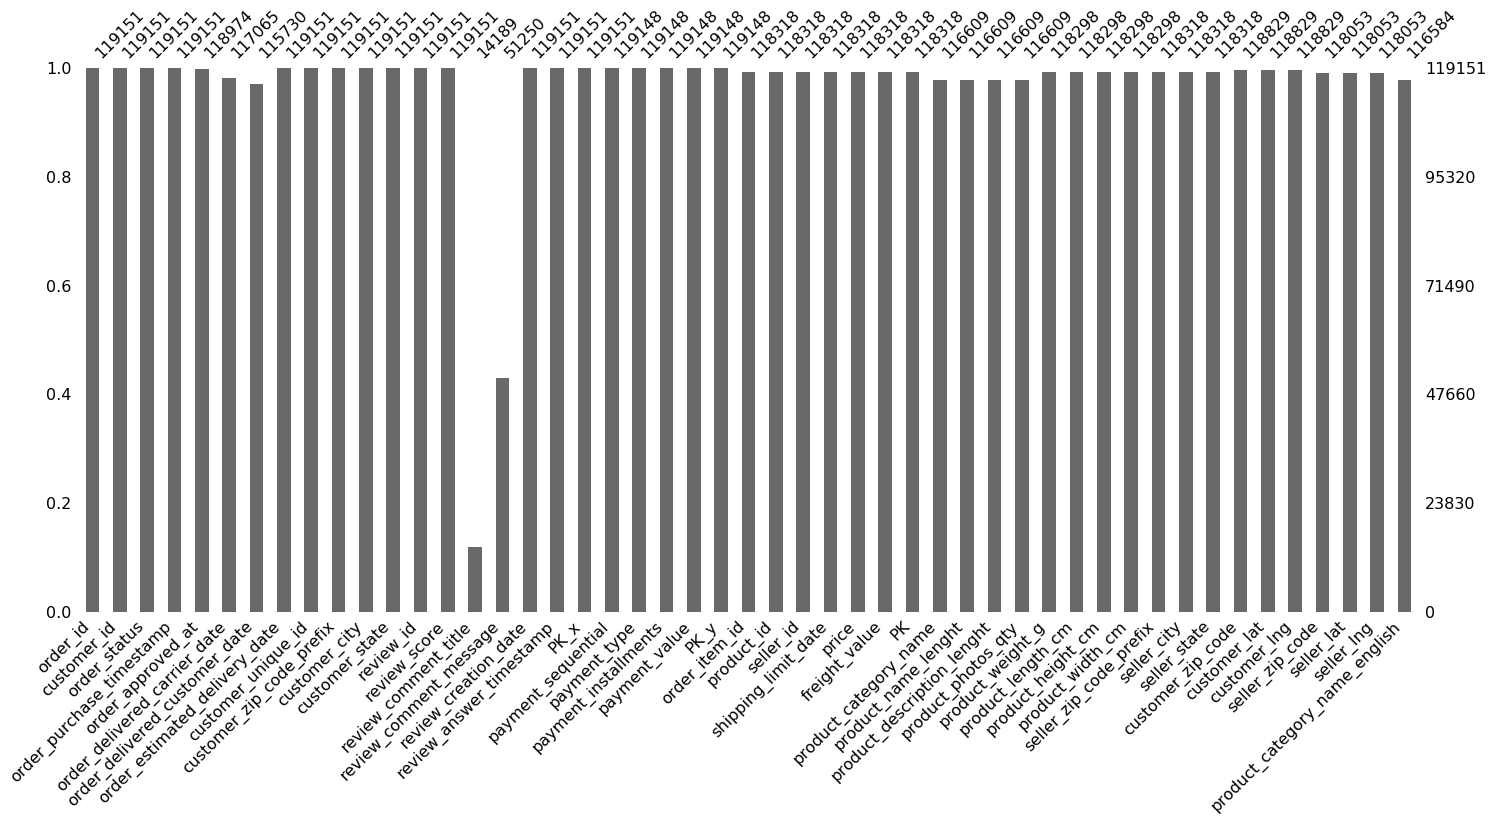

In [46]:
#Visualise missing data
msno.bar(df)

<b>Null Values</b>
- Remove incomplete orders (where no approval date and no customer delivery date)
- Order Item ID, Product ID and Seller ID --> All at 118,318 records
- Product Category Name/length etc --> All at 116,609 records
- Review title and message OK, just need to convert null values to "NA"

<b>Dates</b>
- Make sure all date columns are in the same format

<b>Outliers</b>
- Dates
- Review Score (should be limited)
- Payment value
- Price
- Product Weight/Length + check units

<b>Lexical</b>
- Payment type
- Product Category name
- Product Category Name English



### Null Values

In [47]:
#Remove all incomplete orders
df.dropna(subset = ['order_delivered_customer_date'], inplace = True)

In [48]:
#Remove all unpaid orders
df.dropna(subset = ['order_approved_at'], inplace = True)

In [49]:
#Remove all orders not delivered to the carrier
df.dropna(subset = ['order_delivered_carrier_date'], inplace = True)

In [50]:
#Replace review scores with "No Review"
df['review_comment_title'] = df['review_comment_title'].fillna('NO TITLE')
df['review_comment_message'] = df['review_comment_message'].fillna('NO REVIEW')

In [51]:
#Check remaining % of observations with null values
print(f'Percentage of null values: {round((1 - (len(df.dropna()) / len(df)))*100,2)}%')

Percentage of null values: 1.92%


As 1.9% is a small percentage, we can remove all remaining null values to clean out our data

In [52]:
#Remove remaining null values
df.dropna(inplace = True)

### Dates

In [53]:
#Make list of date columns
date_cols = ['order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date',
             'review_creation_date',
             'review_answer_timestamp',
             'shipping_limit_date'
            ]

In [54]:
#Convert columns to date format
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113493 entries, 0 to 119150
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113493 non-null  object        
 1   customer_id                    113493 non-null  object        
 2   order_status                   113493 non-null  object        
 3   order_purchase_timestamp       113493 non-null  datetime64[ns]
 4   order_approved_at              113493 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113493 non-null  datetime64[ns]
 6   order_delivered_customer_date  113493 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113493 non-null  datetime64[ns]
 8   customer_unique_id             113493 non-null  object        
 9   customer_zip_code_prefix       113493 non-null  int64         
 10  customer_city                  113493 non-null  object        
 11  

### Data Format

In [56]:
#A few columns are incorrectly labelled as integer, we can fix these

#First make a list of columns to correct
format_fix_cols = ['customer_zip_code_prefix',
                   'order_item_id',
                   'seller_zip_code_prefix',
                   'customer_zip_code',
                   'seller_zip_code'
                  ]

for col in format_fix_cols:
    df[col] = df[col].astype(str)

### Outliers

In [57]:
df.describe()

,review_score,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,seller_lat,seller_lng
count,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000,113493.000000
mean,4.066947,1.090816,2.944763,172.176263,120.021610,20.002307,48.788269,784.846484,2.201211,2106.739076,30.282766,16.626312,23.096024,-21.239871,-46.198700,-22.793976,-47.250539
std,1.358070,0.686103,2.780661,266.475178,182.547352,15.740562,10.020932,651.223812,1.713390,3763.212970,16.151074,13.450804,11.715169,5.560569,4.041558,2.704475,2.345025
min,1.000000,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,-33.690972,-72.670987,-32.074657,-63.893145
25%,4.000000,1.000000,1.000000,60.860000,39.900000,13.080000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,-23.590416,-48.108200,-23.608558,-48.829768
50%,5.000000,1.000000,2.000000,108.000000,74.900000,16.310000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,-22.929567,-46.632314,-23.421460,-46.755492
75%,5.000000,1.000000,4.000000,189.370000,133.000000,21.180000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,-20.198139,-43.634611,-21.757690,-46.522148
max,5.000000,26.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,42.184003,-8.577855,-2.498944,-34.855123


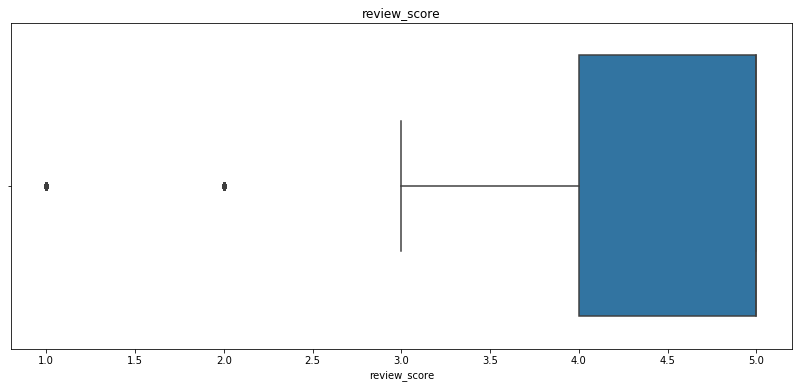

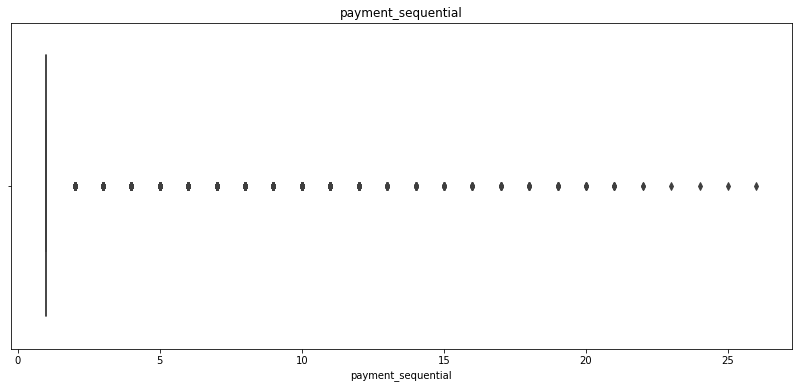

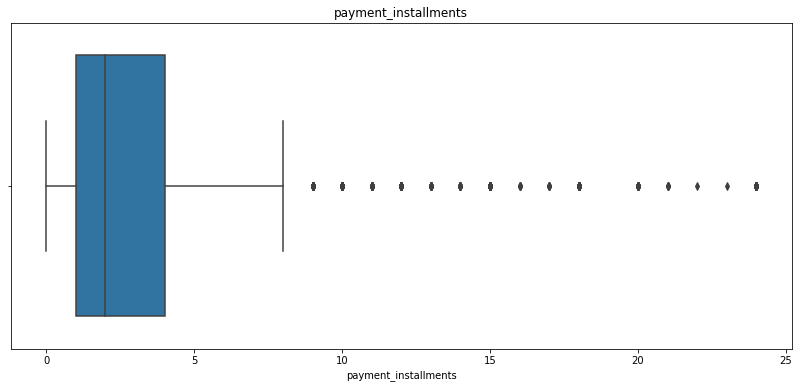

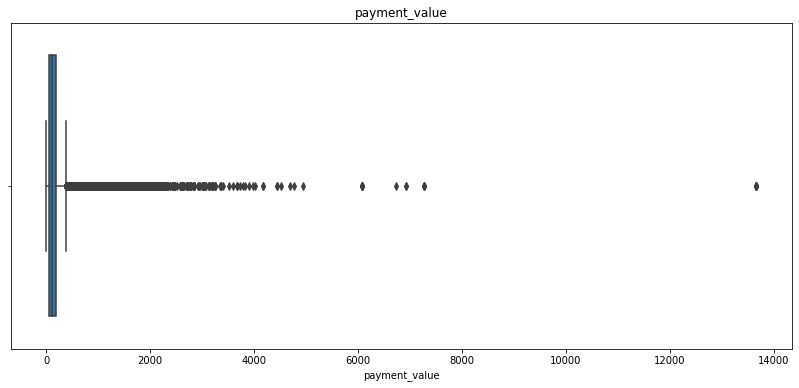

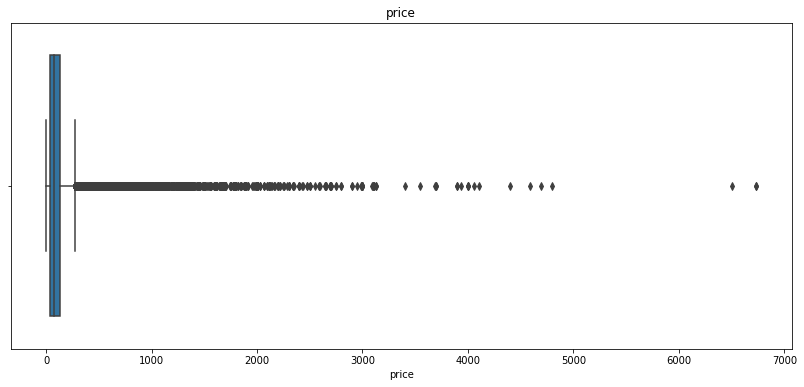

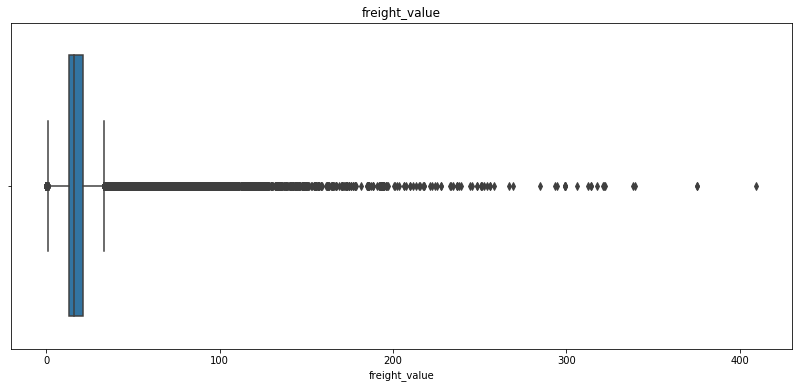

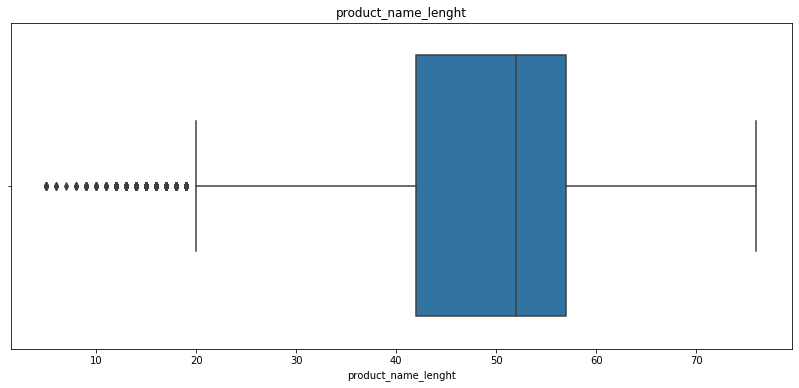

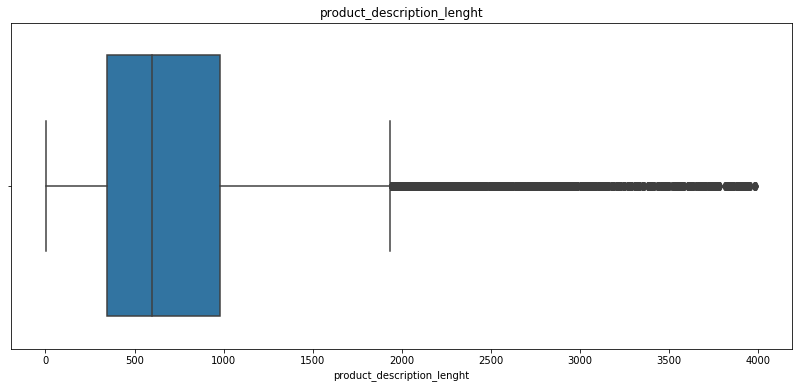

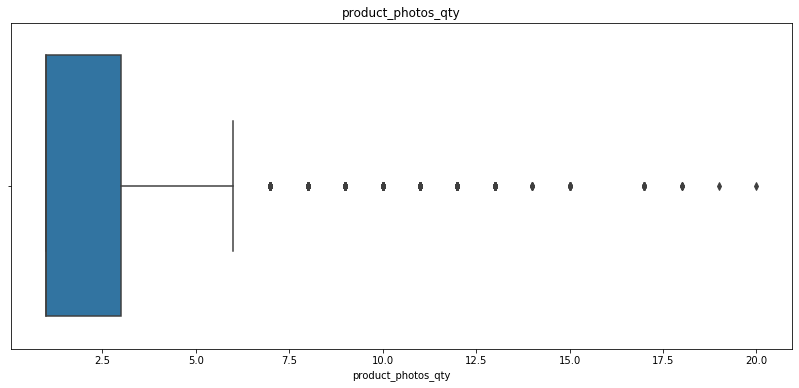

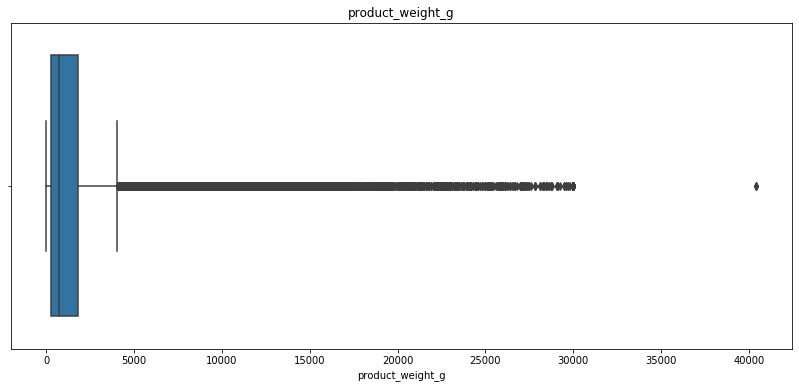

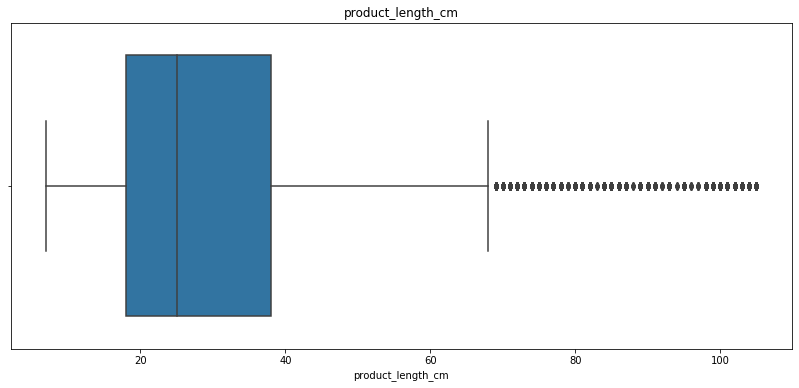

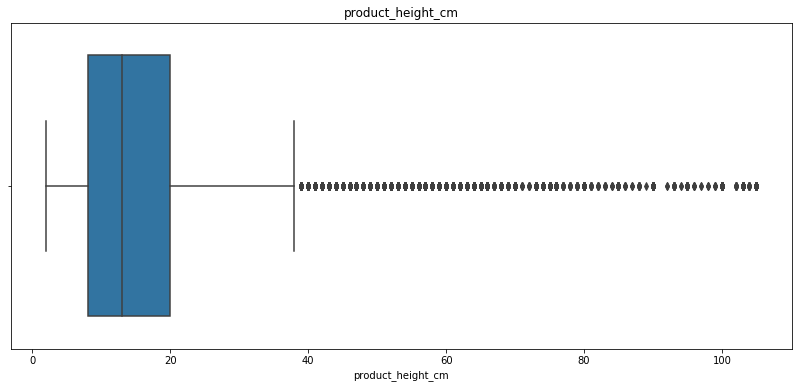

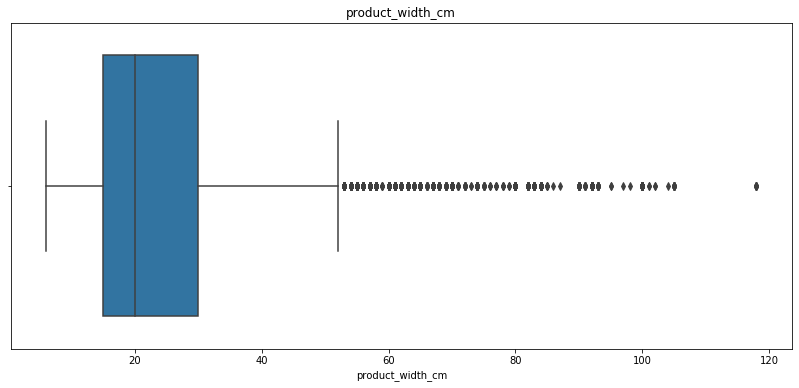

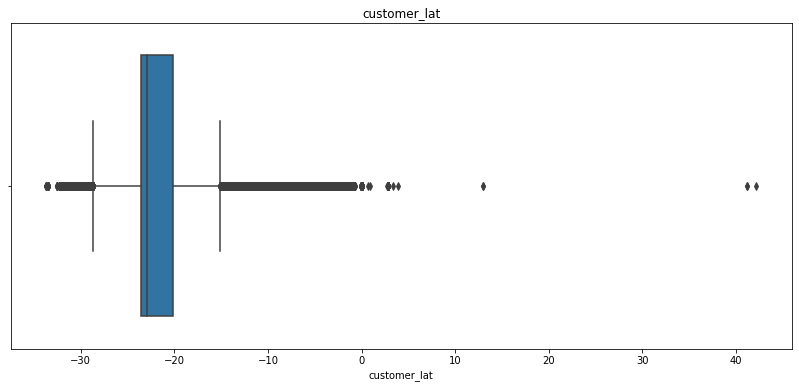

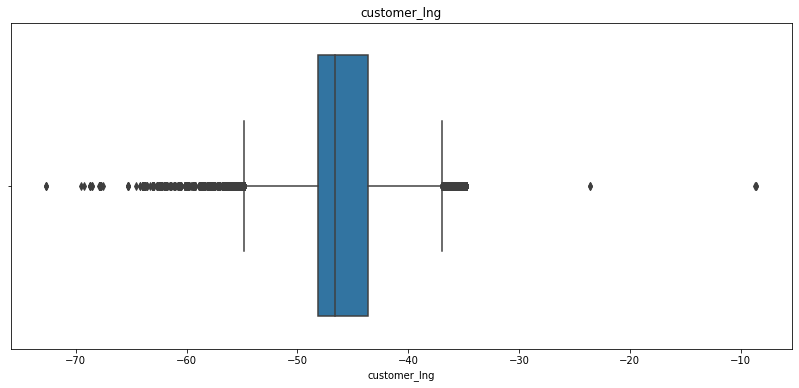

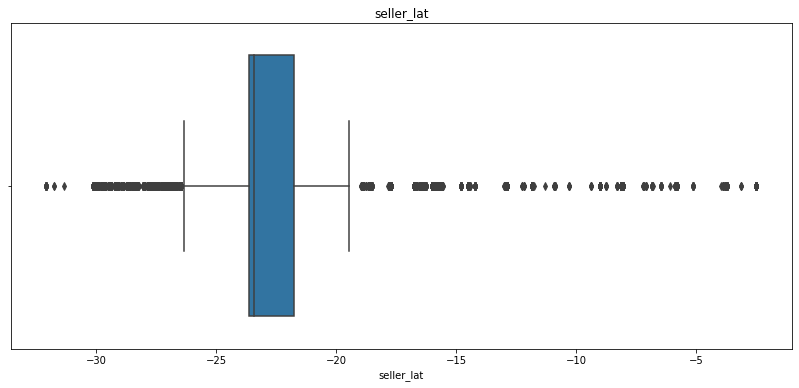

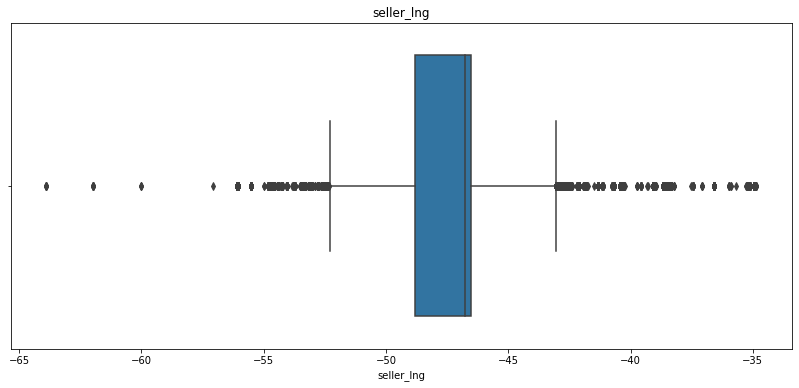

In [58]:
#Check distribution graphs for different columns

#Make list of numerical columns
num_cols = df.select_dtypes([float, int]).columns

#Generate boxplot
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [59]:
#Checking Payment Sequential over 1
df[df['payment_sequential'] >1]['payment_type'].value_counts()

voucher        4446
credit_card     357
debit_card       52
boleto            1
Name: payment_type, dtype: int64

We notice that a large portion of the multiple payments are paid with vouchers, which makes sense. As such, we can keep this data.

In [60]:
#Checking Payment Value
df[df['payment_value'] >5000]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,PK_x,payment_sequential,payment_type,payment_installments,payment_value,PK_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,PK,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code,customer_lat,customer_lng,seller_zip_code,seller_lat,seller_lng,product_category_name_english
4162,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,1b73e6c7cd135008ebeb18404b776ddc,5,NO TITLE,NO REVIEW,2017-06-06,2017-06-07 19:35:23,1b73e6c7cd135008ebeb18404b776ddc_f5136e38d1a14...,1.0,boleto,1.0,6726.66,f5136e38d1a14a4dbd87dff67da82701_1,1.0,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,f5136e38d1a14a4dbd87dff67da82701_1,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,74210.0,goiania,GO,17506.0,-22.203980,-49.959221,74210.0,-16.694946,-49.277094,art
15916,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NO TITLE,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39,211fa81a22870cc634265ea85b751e40_03caa2c082116...,1.0,credit_card,1.0,13664.08,03caa2c082116e1d31e67e9ae3700499_1,1.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,03caa2c082116e1d31e67e9ae3700499_1,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667.0,sao paulo,SP,20080.0,-22.901059,-43.185555,3667.0,-23.532047,-46.496018,fixed_telephony
15917,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NO TITLE,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39,211fa81a22870cc634265ea85b751e40_03caa2c082116...,1.0,credit_card,1.0,13664.08,03caa2c082116e1d31e67e9ae3700499_1,2.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,03caa2c082116e1d31e67e9ae3700499_2,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667.0,sao paulo,SP,20080.0,-22.901059,-43.185555,3667.0,-23.532047,-46.496018,fixed_telephony
15918,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NO TITLE,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39,211fa81a22870cc634265ea85b751e40_03caa2c082116...,1.0,credit_card,1.0,13664.08,03caa2c082116e1d31e67e9ae3700499_1,3.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,03caa2c082116e1d31e67e9ae3700499_3,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667.0,sao paulo,SP,20080.0,-22.901059,-43.185555,3667.0,-23.532047,-46.496018,fixed_telephony
15919,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro

As these really stand out on the graph and we want to understand general clusters, will remove these observations

In [61]:
#Removing all orders above $5000
df = df[df['payment_value'] <5000]

In [62]:
#Checking product above 40KG
df[df['product_weight_g'] >40000]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,PK_x,payment_sequential,payment_type,payment_installments,payment_value,PK_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,PK,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code,customer_lat,customer_lng,seller_zip_code,seller_lat,seller_lng,product_category_name_english
34975,4a45f9f66971302cf881ecfa142f42ba,ccd6a4af78390b7ae560c1cc1cb1a2ff,delivered,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29,32d0420a22921ea161d8bff0e0297b71,88820,icara,SC,62a35e9e362cf9b27b9ee8e047afbedf,1,NO TITLE,NO REVIEW,2018-01-26,2018-01-27 00:42:30,62a35e9e362cf9b27b9ee8e047afbedf_4a45f9f669713...,1.0,credit_card,1.0,96.32,4a45f9f66971302cf881ecfa142f42ba_1,1.0,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-12-29 19:13:20,80.0,16.32,4a45f9f66971302cf881ecfa142f42ba_1,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,14940.0,ibitinga,SP,88820.0,-28.714528,-49.300070,14940.0,-21.75769,-48.829768,bed_bath_table
96685,6ecf1a4051b4c5ed613624b460970a26,958279c23050d6207d196c3057648f6f,delivered,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,SP,13fe815dc5c4076ab42f34545df82ca1,5,NO TITLE,NO REVIEW,2017-12-02,2017-12-04 16:04:31,13fe815dc5c4076ab42f34545df82ca1_6ecf1a4051b4c...,1.0,credit_card,2.0,92.06,6ecf1a4051b4c5ed613624b460970a26_1,1.0,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-11-23 08:55:48,80.0,12.06,6ecf1a4051b4c5ed613624b460970a26_1,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,14940.0,ibitinga,SP,11730.0,-24.112863,-46.667482,14940.0,-21.75769,-48.829768,bed_bath_table
108110,9223919b300f6989e1715333fca0d6ce,51934b734e94e61d8efa4523e175c6c3,delivered,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,PR,1474903cd02494e327de0317af95d846,5,NO TITLE,NO REVIEW,2018-03-28,2018-03-30 12:39:00,1474903cd02494e327de0317af95d846_9223919b300f6...,1.0,credit_card,1.0,96.32,9223919b300f6989e1715333fca0d6ce_1,1.0,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2018-03-07 23:15:32,80.0,16.32,9223919b300f6989e1715333fca0d6ce_1,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,14940.0,ibitinga,SP,86455.0,-23.499933,-49.921450,14940.0,-21.75769,-48.829768,bed_bath_table


Bathroom tables can be heavy items so this doesn't seem out of the ordinary.

### Lexical

In [63]:
#Checking options for payment type
df['payment_type'].value_counts()

credit_card    83725
boleto         22075
voucher         6047
debit_card      1625
Name: payment_type, dtype: int64

In [64]:
df['customer_state'].value_counts()

SP    47999
RJ    14670
MG    13260
RS     6309
PR     5791
SC     4169
BA     3856
GO     2327
ES     2279
DF     2225
PE     1812
CE     1473
PA     1076
MT     1064
MS      836
MA      809
PB      609
RN      555
PI      544
AL      440
SE      383
TO      328
RO      272
AM      168
AC       91
AP       83
RR       44
Name: customer_state, dtype: int64

In [65]:
#Check the Regular ratio from Fuzzy Wuzzy
from fuzzywuzzy import fuzz

#Check similar values within our columns of interest
for i in df['product_category_name_english'].astype('str').unique():
    for j in df['product_category_name_english'].astype('str').unique():
        similarity = fuzz.WRatio(i,j)
        if similarity >=85 and similarity !=100:
            print(f'{i} to {j}: {similarity}%')

computers_accessories to computers: 90%
telephony to fixed_telephony: 90%
small_appliances to small_appliances_home_oven_and_coffee: 90%
food to food_drink: 90%
musical_instruments to music: 90%
home_appliances to home_appliances_2: 94%
party_supplies to art: 90%
home_confort to home_comfort_2: 85%
cds_dvds_musicals to music: 90%
fixed_telephony to telephony: 90%
home_appliances_2 to home_appliances: 94%
art to party_supplies: 90%
art to arts_and_craftmanship: 90%
fashion_male_clothing to fashio_female_clothing: 93%
food_drink to food: 90%
computers to computers_accessories: 90%
home_comfort_2 to home_confort: 85%
small_appliances_home_oven_and_coffee to small_appliances: 90%
fashio_female_clothing to fashion_male_clothing: 93%
music to musical_instruments: 90%
music to cds_dvds_musicals: 90%
arts_and_craftmanship to art: 90%


We can combine a few of these together

In [66]:
df['product_category_name_english'].replace("cds_dvds_musicals", "music", inplace = True)
df['product_category_name_english'].replace("la_cuisine", "kitchen_dining_laundry_garden_furniture", inplace = True)
df['product_category_name_english'].replace("arts_and_craftmanship", "art", inplace = True)
df['product_category_name_english'].replace("home_comfort_2", "home_confort", inplace = True)
df['product_category_name_english'].replace("small_appliances_home_oven_and_coffee", "small_applicances", inplace = True)
df['product_category_name_english'].replace("home_appliances_2", "home_appliances", inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Unnecessary columns

In [67]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,PK_x,payment_sequential,payment_type,payment_installments,payment_value,PK_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,PK,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code,customer_lat,customer_lng,seller_zip_code,seller_lat,seller_lng,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NO TITLE,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,a54f0611adc9ed256b57ede6b6eb5114_e481f51cbdc54...,1.0,credit_card,1.0,18.12,e481f51cbdc54678b7cc49136f2d6af7_1,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,e481f51cbdc54678b7cc49136f2d6af7_1,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3149.0,-23.576170,-46.587276,9350.0,-23.681180,-46.444127,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NO TITLE,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,a54f0611adc9ed256b57ede6b6eb5114_e481f51cbdc54...,3.0,voucher,1.0,2.00,e481f51cbdc54678b7cc49136f2d6af7_3,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,e481f51cbdc54678b7cc49136f2d6af7_1,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3149.0,-23.576170,-46.587276,9350.0,-23.681180,-46.444127,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NO TITLE,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,a54f0611adc9ed256b57ede6b6eb5114_e481f51cbdc54...,2.0,voucher,1.0,18.59,e481f51cbdc54678b7cc49136f2d6af7_2,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,e481f51cbdc54678b7cc49136f2d6af7_1,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3149.0,-23.576170,-46.587276,9350.0,-23.681180,-46.444127,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,8d5266042046a06655c8db133d120ba5_53cdb2fc8bc7d...,1.0,boleto,1.0,141.46,53cdb2fc8bc7dce0b6741e2150273451_1,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,53cdb2fc8bc7dce0b6741e2150273451_1,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,47813.0,-12.126651,-45.008162,31570.0,-19.807013,-43.980966,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NO TITLE,

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113472 entries, 0 to 119150
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113472 non-null  object        
 1   customer_id                    113472 non-null  object        
 2   order_status                   113472 non-null  object        
 3   order_purchase_timestamp       113472 non-null  datetime64[ns]
 4   order_approved_at              113472 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113472 non-null  datetime64[ns]
 6   order_delivered_customer_date  113472 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113472 non-null  datetime64[ns]
 8   customer_unique_id             113472 non-null  object        
 9   customer_zip_code_prefix       113472 non-null  object        
 10  customer_city                  113472 non-null  object        
 11  

In [69]:
df[['customer_zip_code_prefix', 'customer_zip_code']]

,customer_zip_code_prefix,customer_zip_code
0,3149,3149.0
1,3149,3149.0
2,3149,3149.0
3,47813,47813.0
4,75265,75265.0
...,...,...
119146,11722,11722.0
119147,45920,45920.0
119148,28685,28685.0
119149,28685,28685.0


In [70]:
#Listing columns to be dropped
df.drop(columns = ['customer_zip_code',
                   'seller_zip_code',
                   'PK_x',
                   'PK_y',
                   'PK',
                   'product_category_name' #will only use the English one
                  ], inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NO TITLE,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.576170,-46.587276,-23.681180,-46.444127,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NO TITLE,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.576170,-46.587276,-23.681180,-46.444127,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NO TITLE,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.576170,-46.587276,-23.681180,-46.444127,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-12.126651,-45.008162,-19.807013,-43.980966,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NO TITLE,NO REVIEW,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-16.744472,-48.514624,-21.364020,-48.228831,auto


In [72]:
df[df['order_id'] == '47770eb9100c2d0c44946d9cf07ec65d']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,product_category_name_english
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NO TITLE,NO REVIEW,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-16.744472,-48.514624,-21.36402,-48.228831,auto


1 Record = 1 item, 1 installment, 1 payment sequence

## Customer-Centric Dataset

Currently, the dataset is centered around the orders. As the objective is to cluster customers, we want to make this dataset a customer-centric one. To do this, we will create a number of new features:<br>

- Order delivered on time?
- Average number of items purchased per order per customer
- Total items purchased per customer
- Average price paid per customer
- Total price paid per customer
- Number of Orders per customer
- Average review score per customer
- Total number of reviews
- Total number of review messages
- Ratio of reviews / order
- Top category per customer

In [73]:
#Customer Base Table

#Getting the customer info from their latest order as a customer can have multiple addresses on their unique ID
customer_base = df.sort_values(by = ['order_purchase_timestamp'], ascending = False).groupby('customer_unique_id').first()[['customer_zip_code_prefix', 
                                                                                                            'customer_city', 
                                                                                                            'customer_state', 
                                                                                                            'customer_lat', 
                                                                                                            'customer_lng'
                                                                                                           ]] 

For the feature creation below, we always proceed in the same way as the level of detail can cause confusion in the aggregation:
- Generate pivot table consisting of only the level of detail that we need
- Group by Unique Customer ID and perform the desired aggregation
- Rename column

In [74]:
#Check number of unique order IDs
df['order_id'].nunique()

94633

In [75]:
#Total Number of Orders per client
total_orders = df.groupby('customer_unique_id')['order_id'].nunique()
total_orders = total_orders.rename('number_of_orders')

In [76]:
#Items per Client
total_items = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_item_id'], aggfunc = 'size').reset_index()
total_items = total_items.groupby('customer_unique_id')['order_item_id'].count()
total_items = total_items.rename('number_of_items')

In [77]:
#Total product price paid per customer
total_product_price = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_item_id', 'price'], aggfunc = 'size').reset_index()
total_product_price = total_product_price.groupby('customer_unique_id')['price'].sum()
total_product_price = total_product_price.rename('amount_paid')

In [78]:
#Total freight paid per customer
total_freight_price = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_item_id', 'freight_value'], aggfunc = 'size').reset_index()
total_freight_price = total_freight_price.groupby('customer_unique_id')['freight_value'].sum()
total_freight_price = total_freight_price.rename('freight_amount_paid')

In [79]:
#Average Review score
avg_review_score = df.pivot_table(index = ['customer_unique_id', 'order_id', 'review_id', 'review_score'], aggfunc = 'size').reset_index()
avg_review_score = avg_review_score.groupby('customer_unique_id')['review_score'].mean()
avg_review_score = avg_review_score.rename('average_review_score')

In [80]:
#Average time to delivery
avg_del_time = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_delivered_customer_date', 'order_approved_at'], aggfunc = 'size').reset_index()
avg_del_time['Time Diff'] = avg_del_time['order_delivered_customer_date'] - avg_del_time['order_approved_at'] #Calculating time difference
avg_del_time['Time Diff'] = avg_del_time['Time Diff'].dt.days #Converting to days
avg_del_time = avg_del_time.groupby('customer_unique_id')['Time Diff'].mean() #Getting average per customer ID
avg_del_time = avg_del_time.rename('average_delivery_time')

In [81]:
#Average number of payments (Sequential)
avg_payment_count = df.pivot_table('payment_sequential', index = ['customer_unique_id', 'order_id'], aggfunc = 'max').reset_index()
avg_payment_count = avg_payment_count.groupby('customer_unique_id')['payment_sequential'].mean()
avg_payment_count = avg_payment_count.rename('average_number_of_payments')

In [82]:
#Average number of installments
avg_installments = df.pivot_table('payment_installments', index = ['customer_unique_id', 'order_id'], aggfunc = 'max').reset_index()
avg_installments = avg_installments.groupby('customer_unique_id')['payment_installments'].mean()
avg_installments = avg_installments.rename('average_payment_installments')

In [83]:
#Visualize product categories
df['product_category_name_english'].value_counts()

bed_bath_table                             11788
health_beauty                               9788
sports_leisure                              8774
furniture_decor                             8620
computers_accessories                       7938
housewares                                  7177
watches_gifts                               6051
telephony                                   4574
garden_tools                                4468
auto                                        4291
toys                                        4159
cool_stuff                                  3871
perfumery                                   3492
baby                                        3110
electronics                                 2714
stationery                                  2557
fashion_bags_accessories                    2118
pet_shop                                    1985
office_furniture                            1757
luggage_accessories                         1144
consoles_games      

In [84]:
#Group up product categories into 13 larger categories
cat_dict = {
    #Furniture and Household Goods
    'bed_bath_table' : 'Home',
    'furniture_decor': 'Home',
    'housewares': 'Home',
    'kitchen_dining_laundry_garden_furniture': 'Home',
    'home_confort': 'Home',
    'furniture_living_room': 'Home',
    'christmas_supplies': 'Home',
    'furniture_bedroom': 'Home',
    'party_supplies': 'Home',
    'furniture_mattress_and_upholstery': 'Home',
    'garden_tools': 'Home',
    'flowers': 'Home',

    #Electronics
    'computers_accessories': 'Electronics',
    'telephony': 'Electronics',
    'electronics': 'Electronics',
    'air_conditioning': 'Electronics',
    'fixed_telephony': 'Electronics',
    'computers': 'Electronics',
    'tablets_printing_image': 'Electronics',
    'small_appliances': 'Electronics',
    'home_appliances': 'Electronics',
    'small_applicances': 'Electronics',
    
    #Automobile
    'auto': 'Automobile',
    
    #Health, Beauty and Fashion
    'perfumery': 'Beauty',
    'health_beauty' : 'Beauty',
    'fashion_bags_accessories': 'Beauty',
    'fashion_shoes': 'Beauty',
    'fashion_underwear_beach': 'Beauty',
    'fashion_male_clothing': 'Beauty',
    'fashio_female_clothing': 'Beauty',
    'watches_gifts': 'Beauty',
    
    #Children
    'baby': 'Children',
    'toys': 'Children',
    'diapers_and_hygiene': 'Children',
    'fashion_childrens_clothes': 'Children',
    
    #Office and Stationery
    'stationery': 'Professional',
    'office_furniture': 'Professional',
    'industry_commerce_and_business': 'Professional',
    'agro_industry_and_commerce': 'Professional',
    'security_and_services': 'Professional',
    
    #Pets
    'pet_shop': 'Pets',
    
    #Entertainment
    'consoles_games': 'Entertainment',
    'audio': 'Entertainment',
    'musical_instruments': 'Entertainment',
    'books_general_interest': 'Entertainment',
    'books_technical': 'Entertainment',
    'art': 'Entertainment',
    'cine_photo': 'Entertainment',
    'dvds_blu_ray': 'Entertainment',
    'books_imported': 'Entertainment',
    'music': 'Entertainment',
    
    #Construction
    'construction_tools_construction': 'Construction',
    'home_construction': 'Construction',
    'construction_tools_lights': 'Construction',
    'costruction_tools_garden': 'Construction',
    'signaling_and_security': 'Construction',
    'construction_tools_safety': 'Construction',
    'costruction_tools_tools': 'Construction',
    
    #Food and Drinks
    'food_drink': 'Food',
    'drinks': 'Food',
    'food': 'Food',
    
    #Travel
    'luggage_accessories': 'Travel', #Travel?
    
    #Sports
    'sports_leisure': 'Sports',
    'fashion_sport': 'Sports',
    
    #Other
    'cool_stuff': 'Other',
    'market_place': 'Other'
}

In [85]:
#Replace category names
df['product_category_name_english'] = df['product_category_name_english'].replace(cat_dict)

#Visualize product categories
df['product_category_name_english'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Home             33716
Beauty           22045
Electronics      17896
Sports            8802
Children          7313
Professional      4823
Automobile        4291
Other             4196
Entertainment     3499
Construction      2598
Pets              1985
Food              1164
Travel            1144
Name: product_category_name_english, dtype: int64

In [86]:
#Get Total Amount paid per category

#Create Total Price column
df['total_price'] = df['price'] + df['freight_value']

#Create level of detail
price_per_cat = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_item_id', 'product_category_name_english', 'total_price'], aggfunc = 'size').reset_index()
#Get a sum per category and aggregate on customer unique id
price_per_cat = price_per_cat.pivot_table('total_price', index = 'customer_unique_id', columns = 'product_category_name_english', aggfunc = 'sum').reset_index()
#Replace NA values with 0
price_per_cat.fillna(0, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [87]:
#Get Total Amount paid per payment method

#Create level of detail
payment_per_method = df.pivot_table(index = ['customer_unique_id', 'order_id', 'payment_type', 'payment_sequential', 'payment_value'], aggfunc = 'size').reset_index()
payment_per_method = payment_per_method.pivot_table('payment_value', index = 'customer_unique_id', columns = 'payment_type', aggfunc = 'sum').reset_index()
payment_per_method.fillna(0, inplace = True)

In [88]:
#Last Purchase Date
last_purchase_date = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_purchase_timestamp'], aggfunc = 'size').reset_index()
last_purchase_date = last_purchase_date.pivot_table('order_purchase_timestamp', index = 'customer_unique_id', aggfunc = 'max').reset_index()
last_purchase_date.rename(columns = {'order_purchase_timestamp' : 'last_purchase_date'}, inplace = True)

In [89]:
#Estimated vs Actual Delivery
est_vs_act_del = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_estimated_delivery_date', 'order_delivered_customer_date'], aggfunc = 'size').reset_index()
est_vs_act_del['avg_delivery_delay'] = est_vs_act_del['order_delivered_customer_date'] - est_vs_act_del['order_estimated_delivery_date']
est_vs_act_del['avg_delivery_delay'] = est_vs_act_del['avg_delivery_delay'].dt.days
est_vs_act_del = est_vs_act_del.pivot_table('avg_delivery_delay', index = 'customer_unique_id', aggfunc = 'mean').reset_index()

In [90]:
#Shipping to Logistics Partner delay
carrier_delay = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_delivered_carrier_date', 'shipping_limit_date'], aggfunc = 'size').reset_index()
carrier_delay['carrier_avg_delay'] = carrier_delay['order_delivered_carrier_date'] - carrier_delay['shipping_limit_date']
carrier_delay['carrier_avg_delay'] = carrier_delay['carrier_avg_delay'].dt.days
carrier_delay = carrier_delay.pivot_table('carrier_avg_delay', index = 'customer_unique_id', aggfunc = 'mean').reset_index()

In [91]:
#Max Product Category
max_category = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_item_id', 'product_category_name_english', 'total_price'], aggfunc = 'size').reset_index()
max_category = max_category.pivot_table('total_price', index = ['customer_unique_id', 'product_category_name_english'], aggfunc = 'sum').reset_index()
max_category.sort_values(by = ['customer_unique_id', 'total_price'], ascending = False, inplace = True)
max_category = max_category.groupby(['customer_unique_id'])['product_category_name_english'].first()

In [92]:
#Max Payment Category
max_payment_category = df.pivot_table(index = ['customer_unique_id', 'order_id', 'order_item_id', 'payment_type', 'total_price'], aggfunc = 'size').reset_index()
max_payment_category = max_payment_category.pivot_table('total_price', index = ['customer_unique_id', 'payment_type'], aggfunc = 'sum').reset_index()
max_payment_category.sort_values(by = ['customer_unique_id', 'total_price'], ascending = False, inplace = True)
max_payment_category = max_payment_category.groupby(['customer_unique_id'])['payment_type'].first()

In [93]:
new_features = [total_orders,
                total_items,
                total_product_price,
                total_freight_price,
                avg_review_score,
                avg_del_time,
                avg_payment_count,
                avg_installments,
                price_per_cat,
                payment_per_method,
                last_purchase_date,
                est_vs_act_del,
                carrier_delay,
                max_category,
                max_payment_category
               ]

In [94]:
#Adding new features to customer base
for i in new_features:
    customer_base = pd.merge(customer_base, i, left_on = 'customer_unique_id', right_on = 'customer_unique_id', how = 'left')

In [95]:
customer_base.reset_index(inplace = True)

## Customer Base Cleaning

In [96]:
#Remove useless column
customer_base.drop(columns = 'index', inplace = True)

In [97]:
customer_base.describe()

,customer_lat,customer_lng,number_of_orders,number_of_items,amount_paid,freight_amount_paid,average_review_score,average_delivery_time,average_number_of_payments,average_payment_installments,Automobile,Beauty,Children,Construction,Electronics,Entertainment,Food,Home,Other,Pets,Professional,Sports,Travel,boleto,credit_card,debit_card,voucher,avg_delivery_delay,carrier_avg_delay
count,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000,91609.000000
mean,-21.190435,-46.182922,1.033010,1.179655,141.182881,23.556243,4.141437,11.637995,1.044542,2.919605,7.291343,36.485903,10.995796,4.596816,25.966392,6.019139,0.893329,40.069327,7.820961,2.712727,7.835509,12.217039,1.834842,29.377176,129.560587,2.226794,3.671589,-11.863609,-3.836371
std,5.617036,4.059903,0.206601,0.619393,205.687360,22.791203,1.290346,9.513447,0.362736,2.695617,61.329146,120.143244,63.859748,51.116262,129.509257,61.641362,15.030703,105.398611,55.093796,30.108793,56.166546,67.712731,22.278530,105.748514,206.114899,34.643976,29.346233,10.142424,4.080180
min,-33.690972,-72.670987,1.000000,1.000000,0.850000,0.000000,1.000000,-7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-147.000000,-526.000000
25%,-23.590003,-48.119474,1.000000,1.000000,47.650000,14.060000,4.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.390000,0.000000,0.000000,-17.000000,-6.000000
50%,-22.923571,-46.632664,1.000000,1.000000,89.180000,17.600000,5.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.330000,0.000000,0.000000,-12.000000,-4.000000
75%,-20.137901,-43.619483,1.000000,1.000000,154.900000,25.540000,5.000000,15.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,158.550000,0.000000,0.000000,-7.000000,-2.000000
max,42.184003,-8.577855,14.000000,24.000000,7388.000000,1794.960000,5.000000,208.000000,26.000000,24.000000,2480.580000,4445.500000,4034.440000,3242.840000,7571.630000,4513.320000,3018.600000,3979.550000,3184.340000,2574.380000,3406.470000,4163.510000,1328.080000,3979.550000,7571.630000,4445.500000,1839.050000,188.000000,95.000000


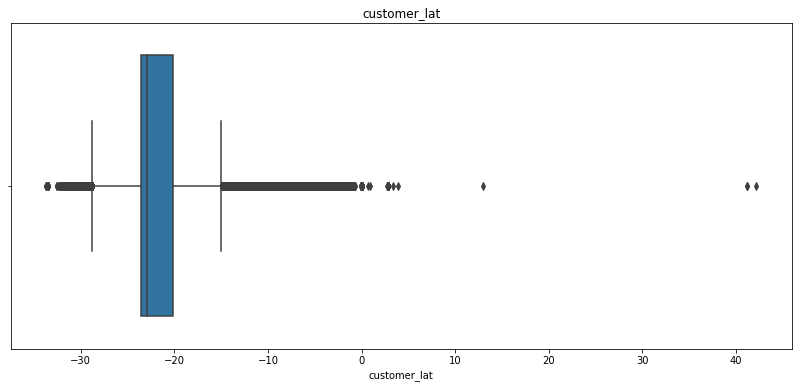

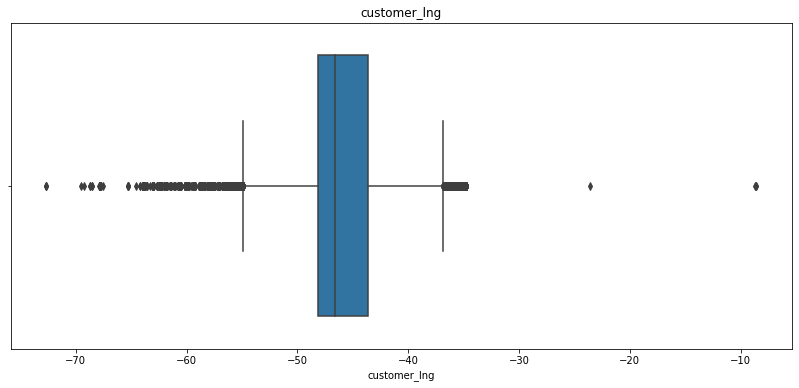

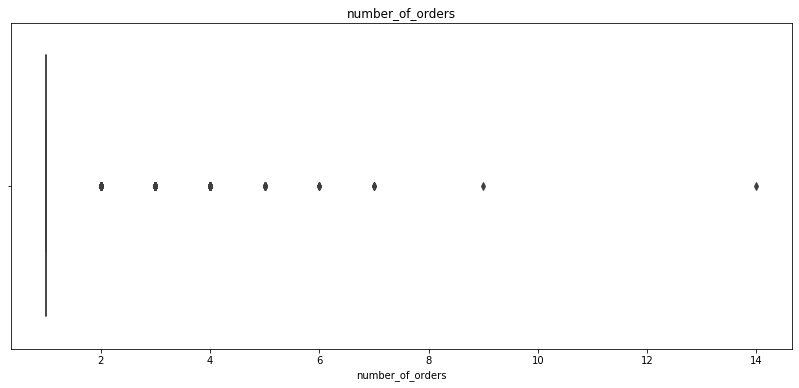

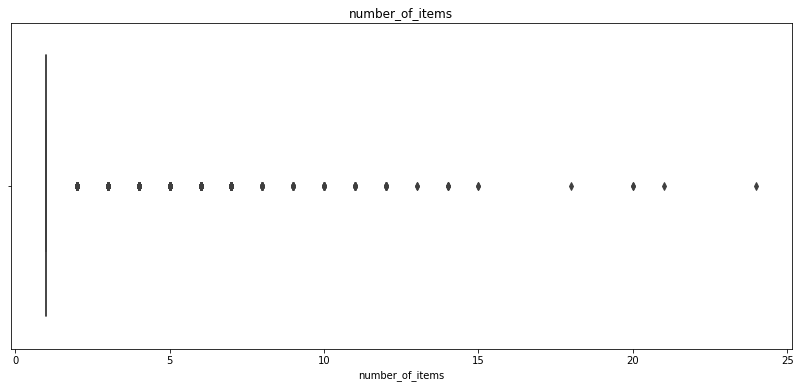

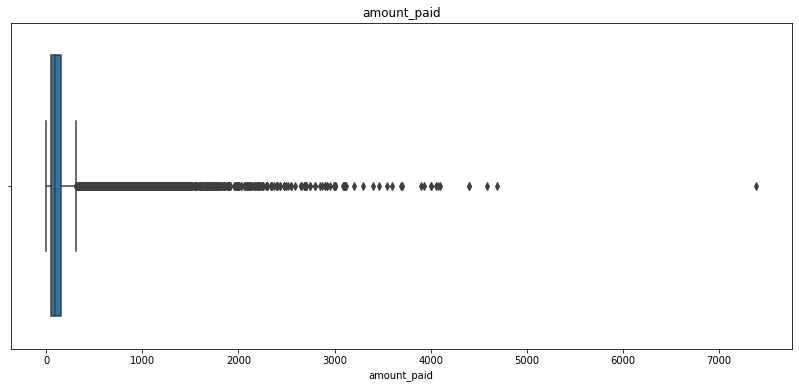

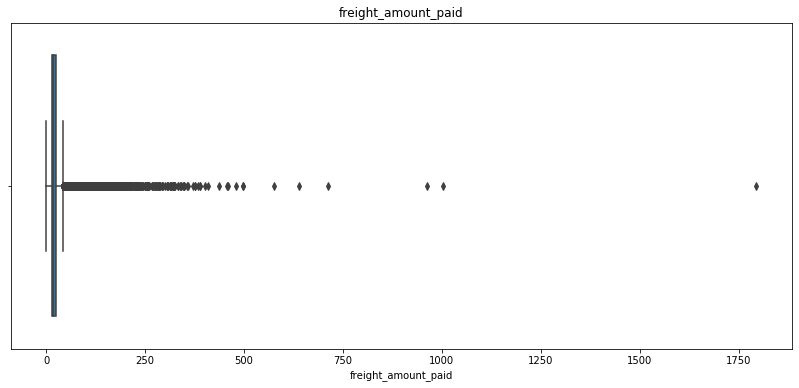

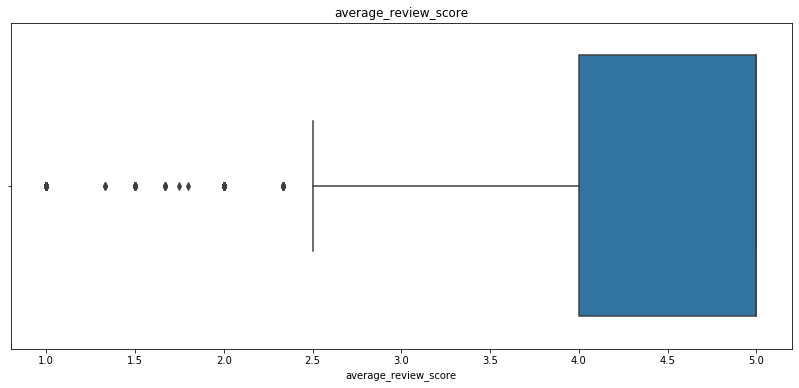

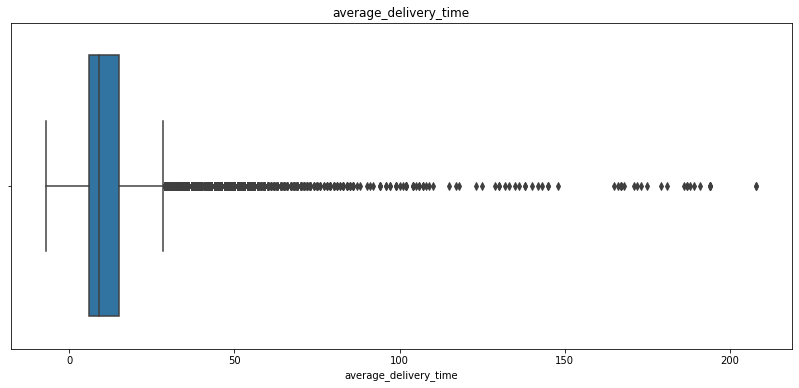

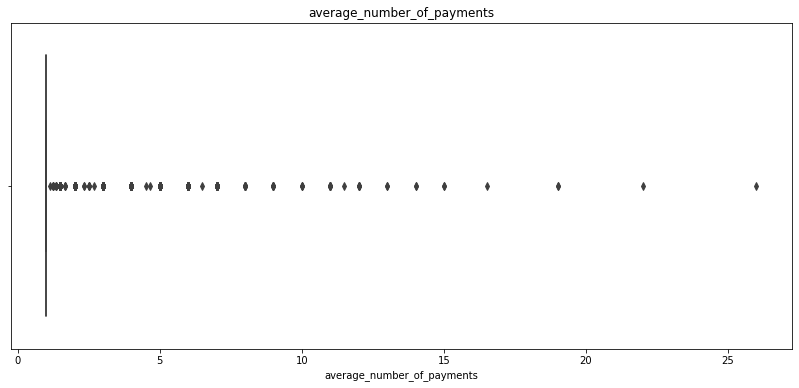

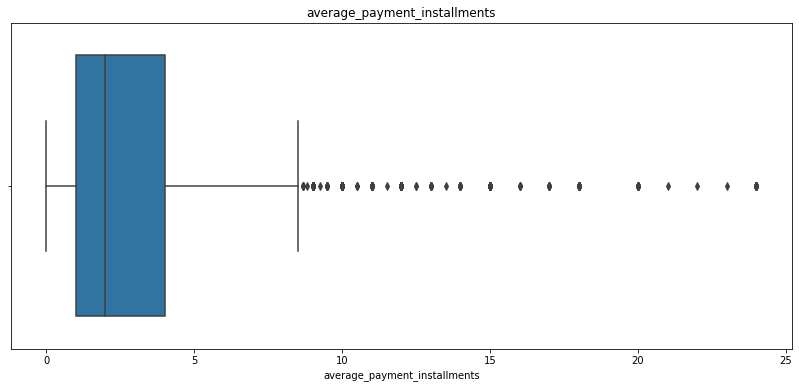

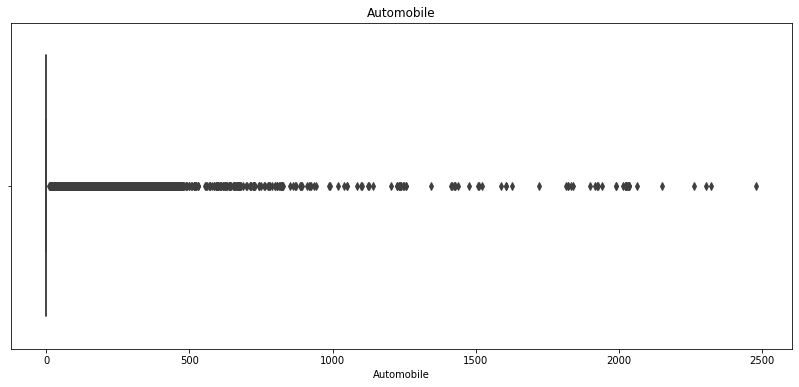

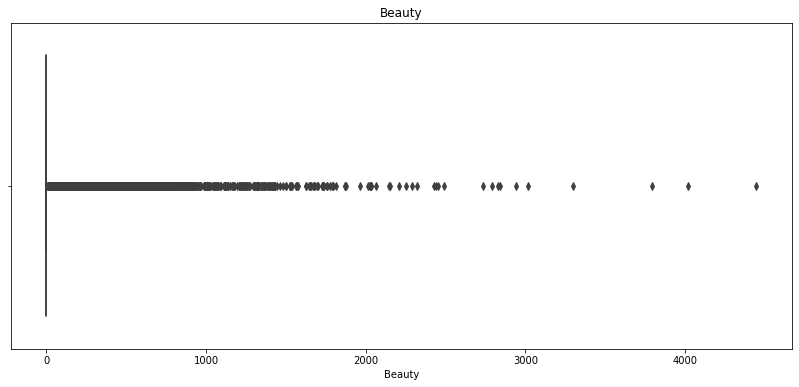

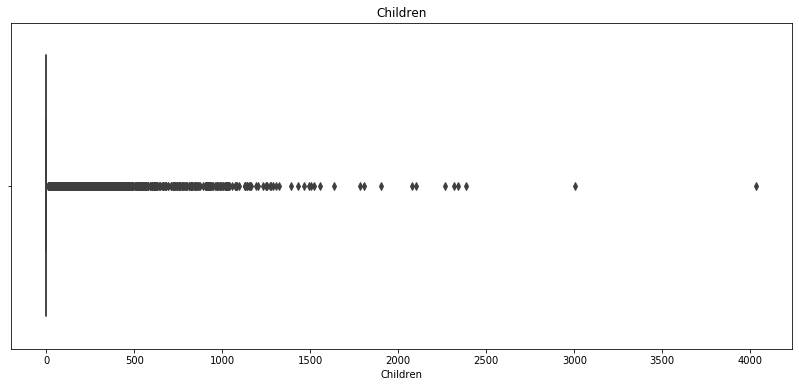

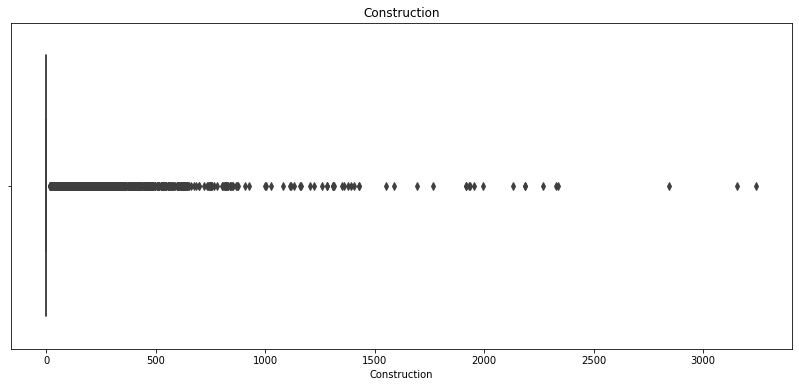

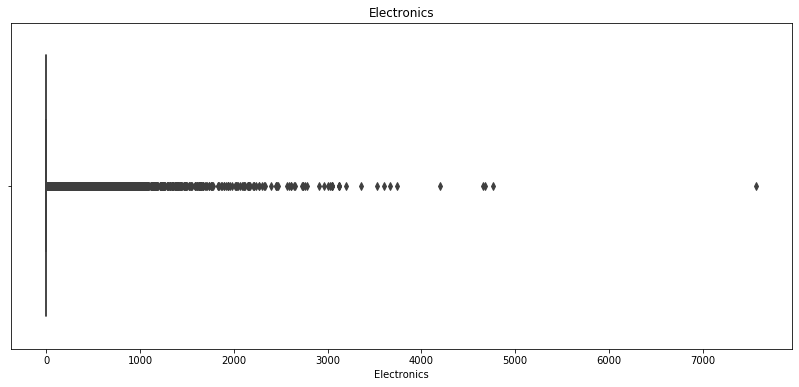

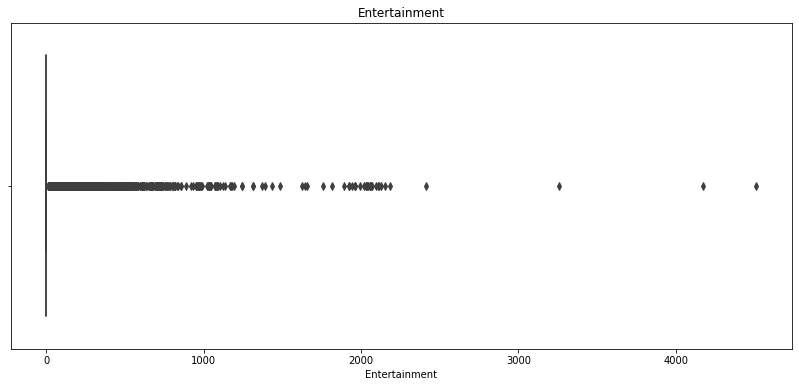

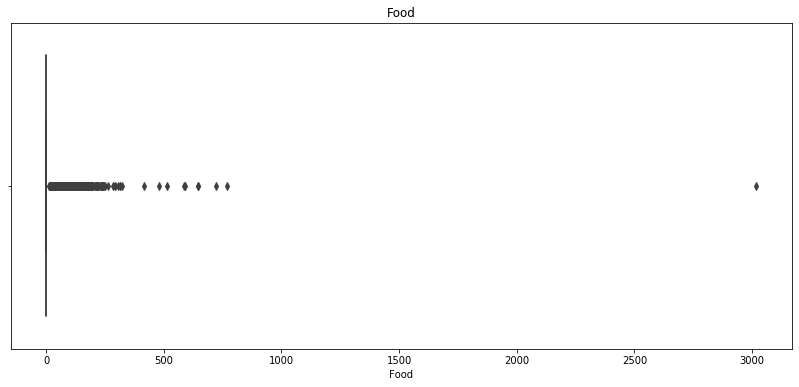

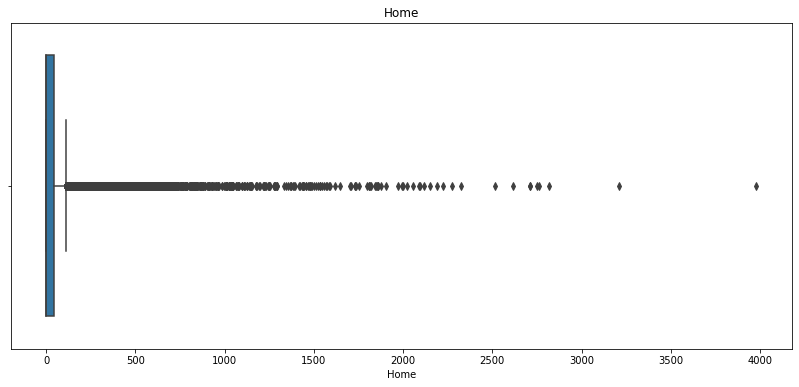

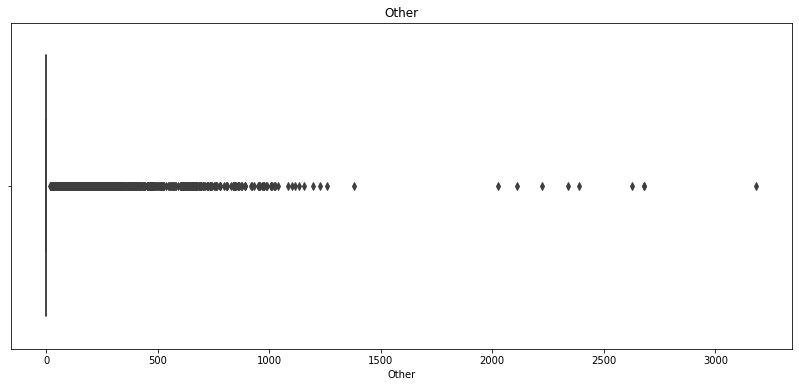

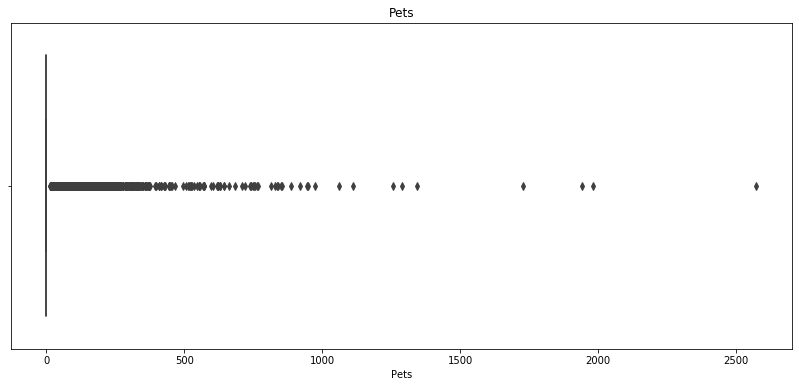

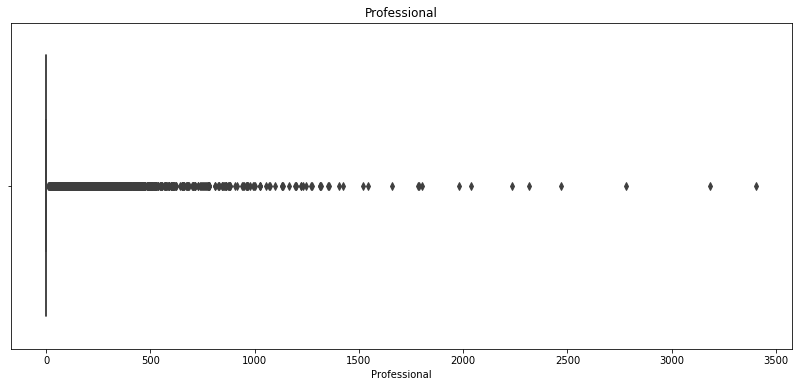

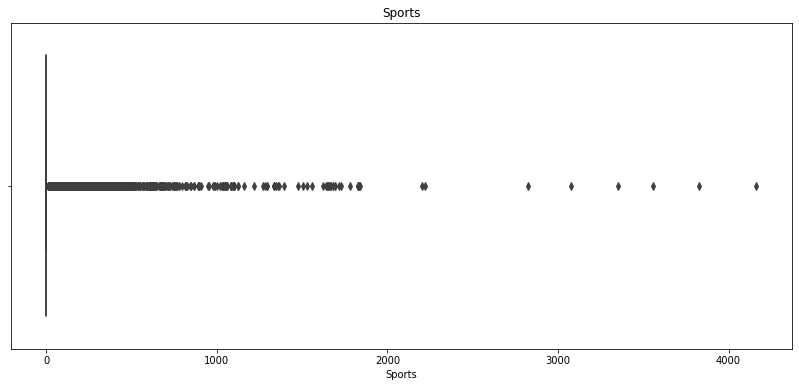

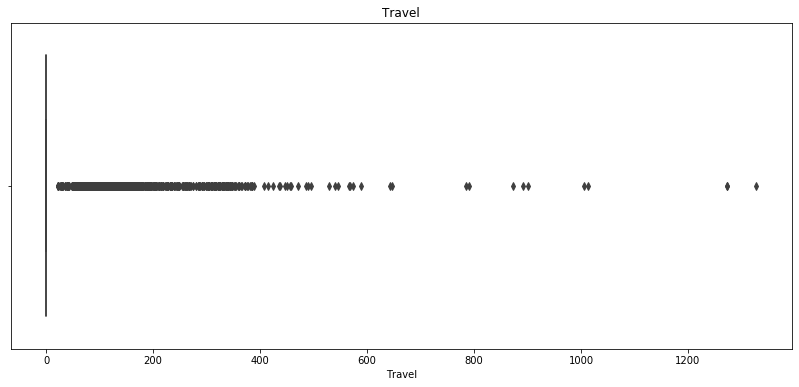

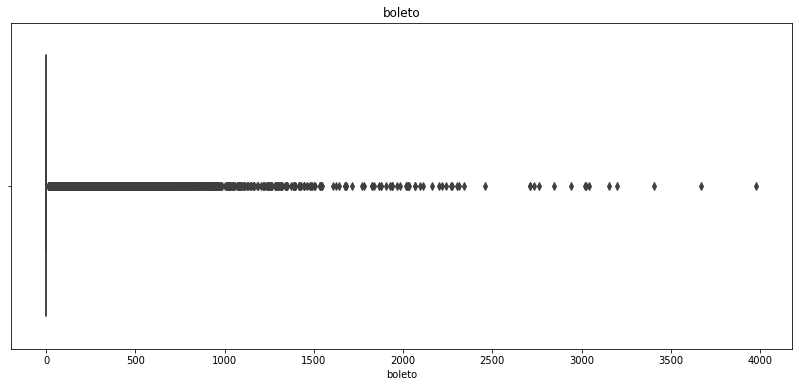

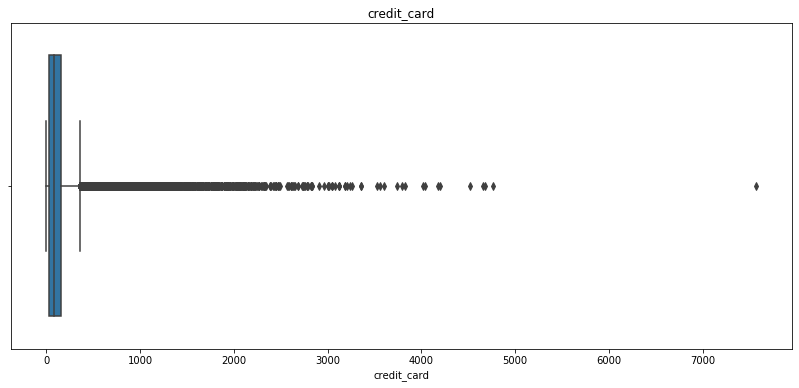

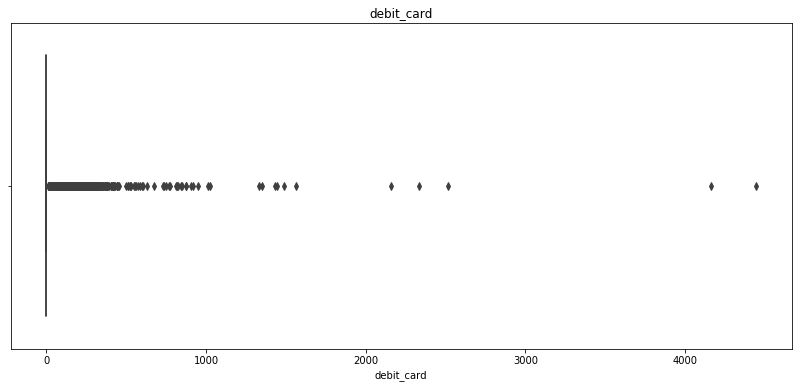

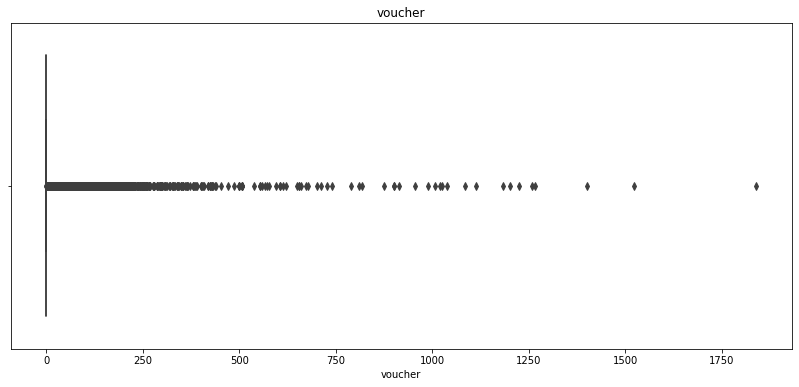

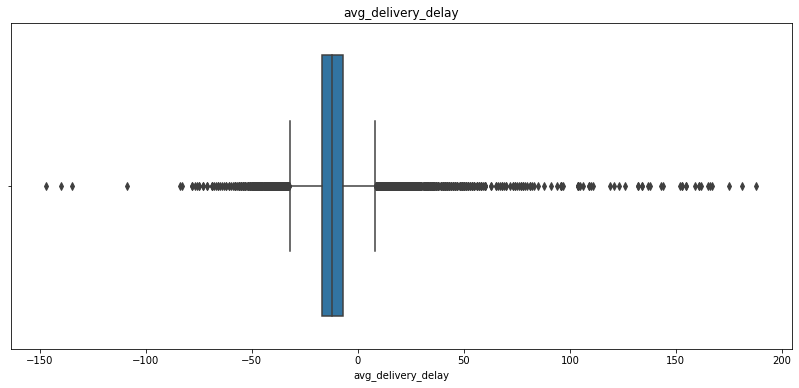

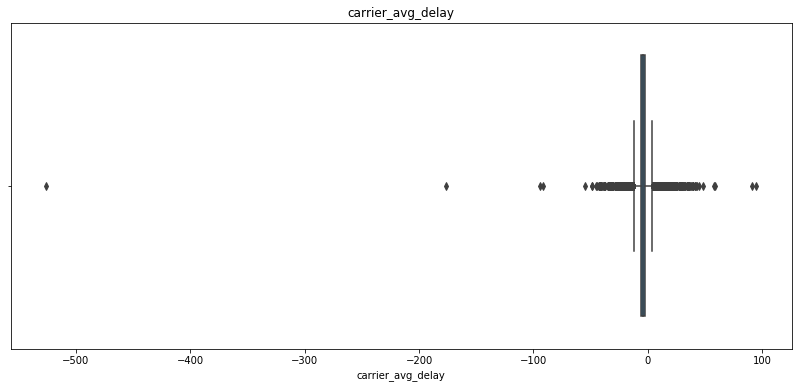

In [98]:
#Check distribution graphs for different columns

#Make list of numerical columns
num_cols = customer_base.select_dtypes([float, int]).columns

#Generate boxplot
for col in num_cols:
    sns.boxplot(customer_base[col])
    plt.title(col)
    plt.show()

### Data Cleaning

In [99]:
#Getting the index locations of all records that are in the 0.01st or 99.9th percentile and adding them to a list
outlier_index = []
outlier_index_flat = []
for col in customer_base.select_dtypes(include = ['int','float']).columns.tolist():
    high_quartile = customer_base[col].quantile(0.999)
    low_quartile = customer_base[col].quantile(0.001)
    outlier_index.append(customer_base[customer_base[col] > high_quartile].index.to_list())
    outlier_index.append(customer_base[customer_base[col] < low_quartile].index.to_list())

In [100]:
#Flatten this list out
for i in outlier_index:
    for j in i:
        outlier_index_flat.append(j)
        
#Remove duplicates
outlier_index_no_dups = [] 
for i in outlier_index_flat: 
    if i not in outlier_index_no_dups: 
        outlier_index_no_dups.append(i)
        
#Remove values
print(f'Removing {len(outlier_index_no_dups)} records ({round(len(outlier_index_no_dups) / len(customer_base),2)*100}%)')
customer_base.drop(customer_base.index[[outlier_index_no_dups]], inplace= True)

Removing 2407 records (3.0%)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


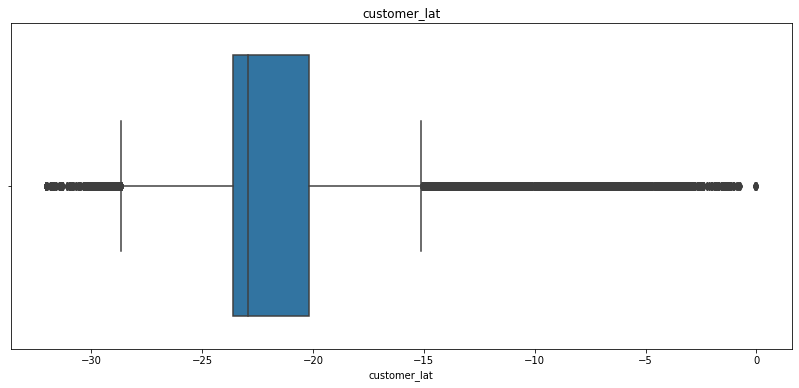

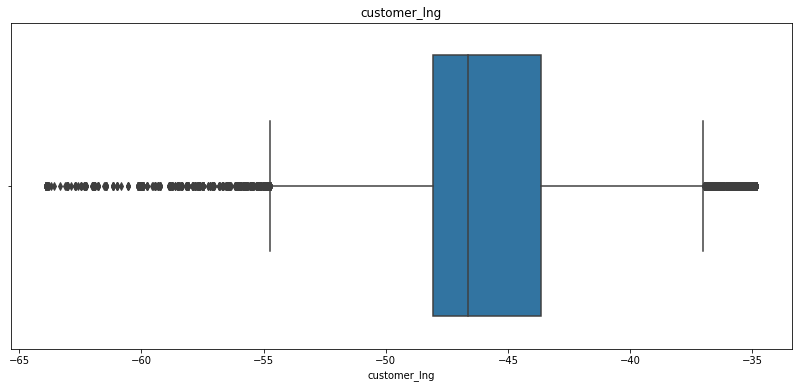

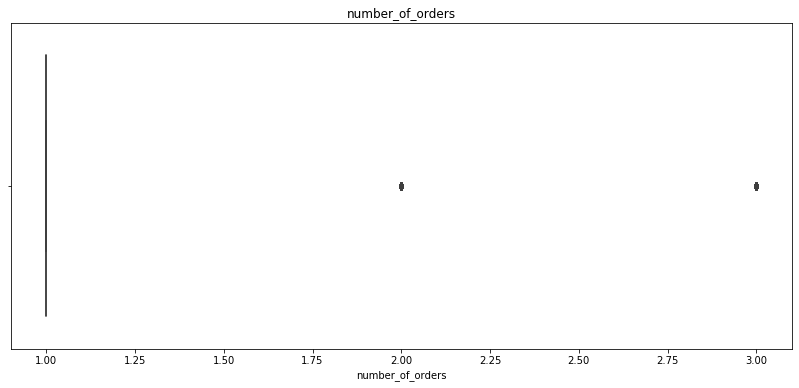

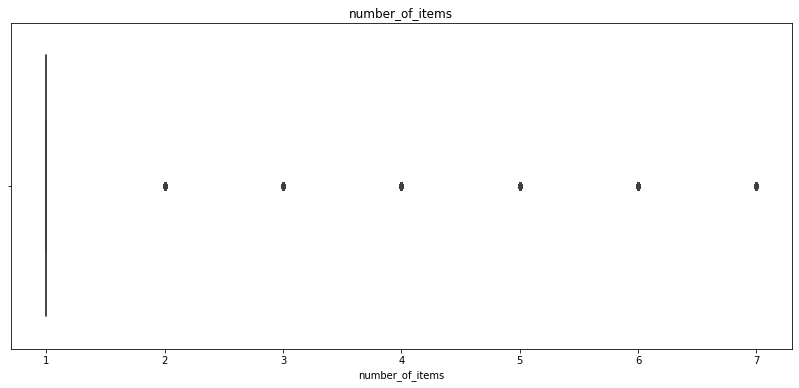

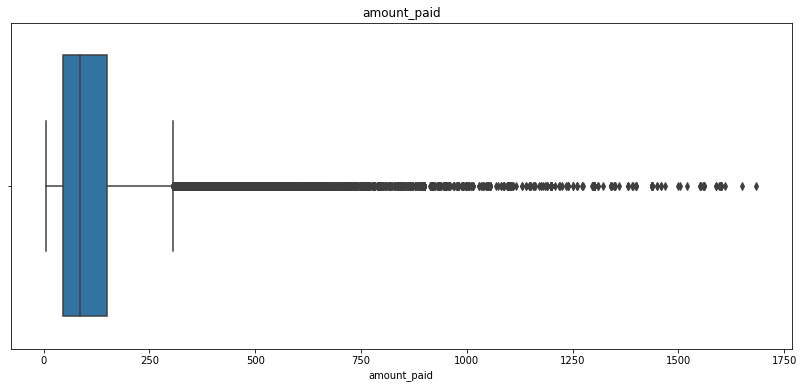

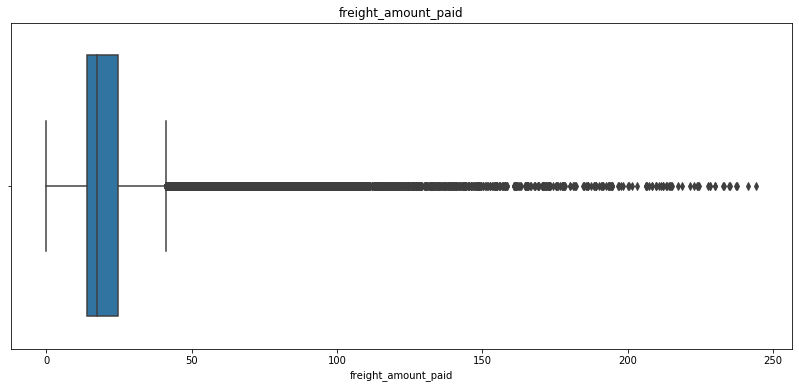

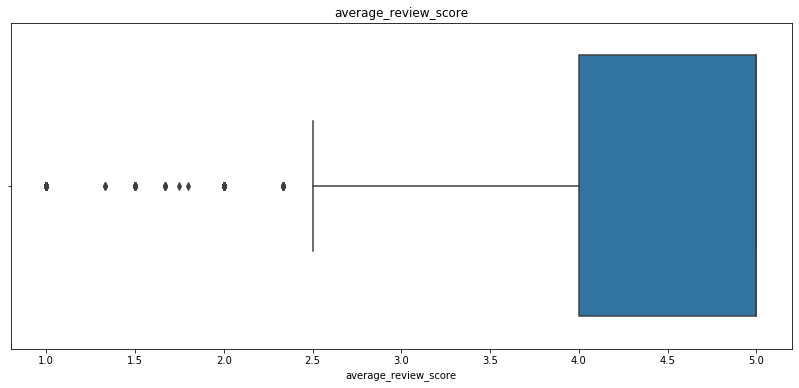

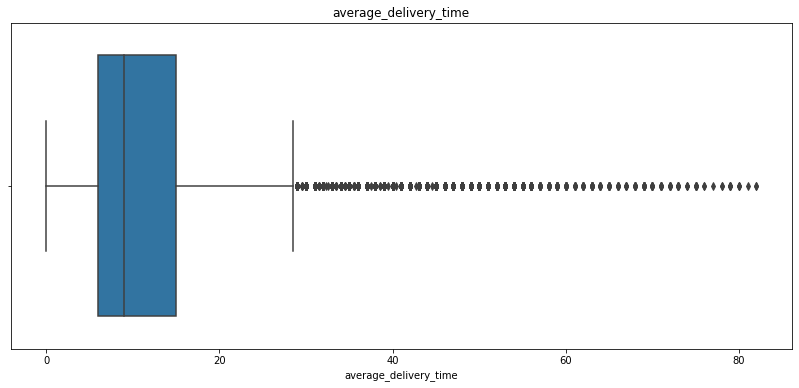

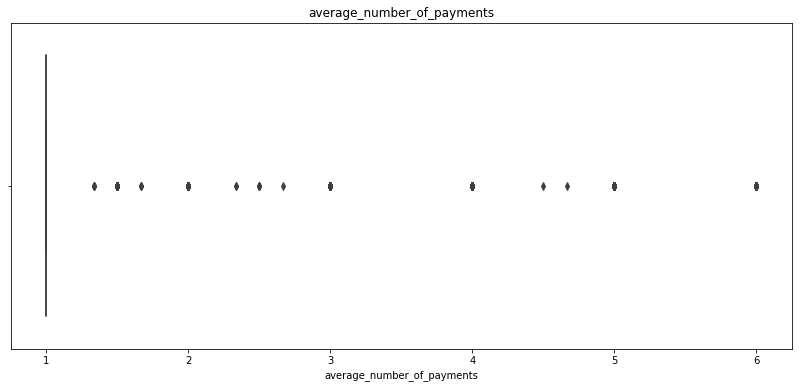

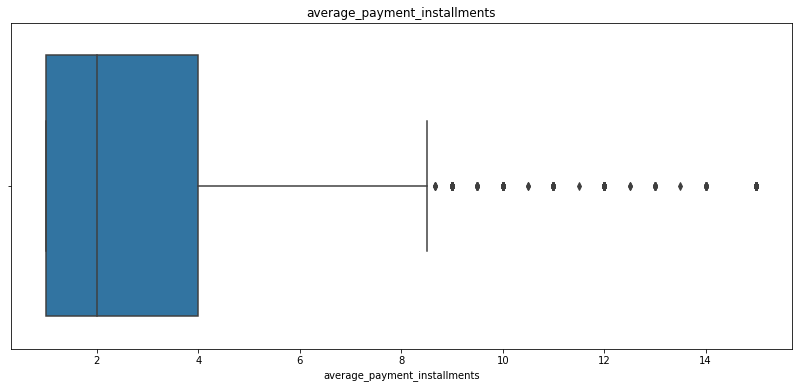

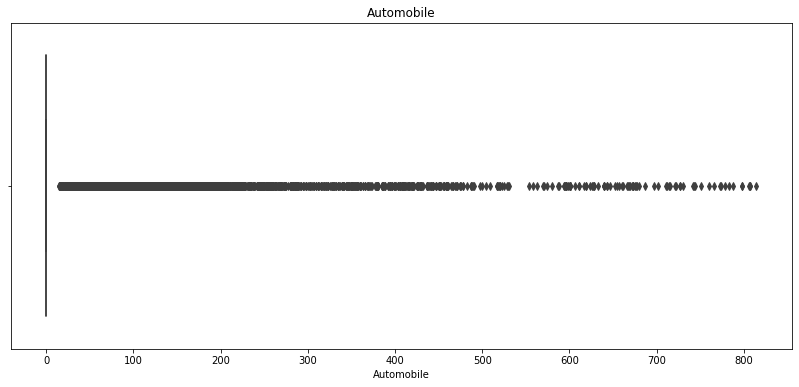

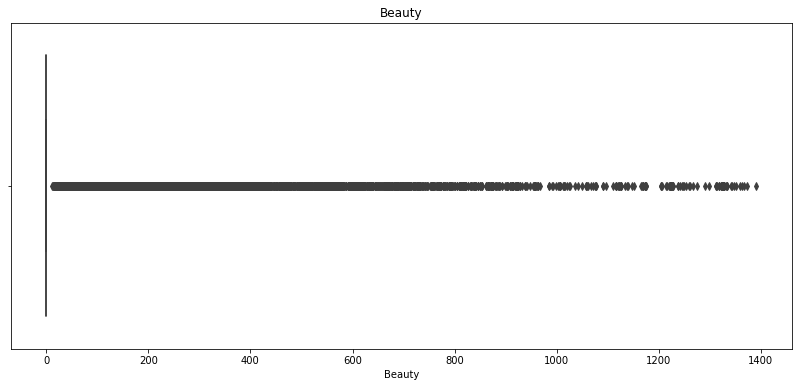

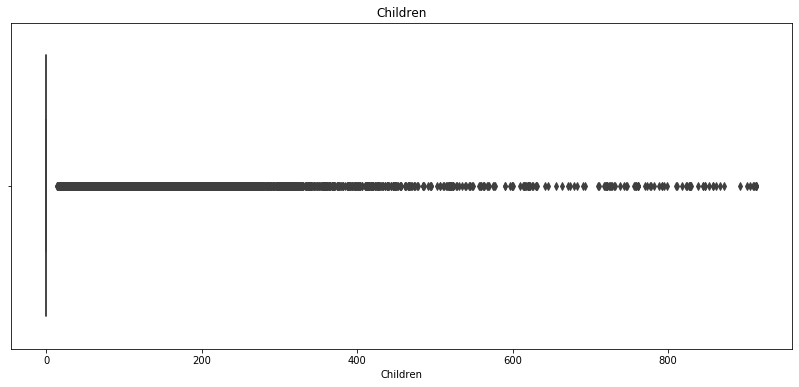

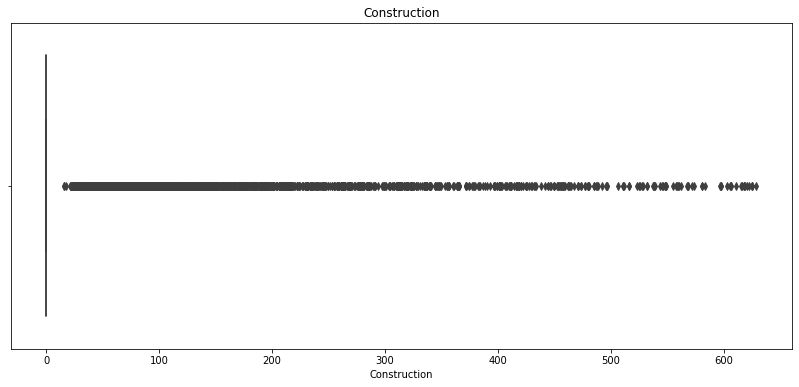

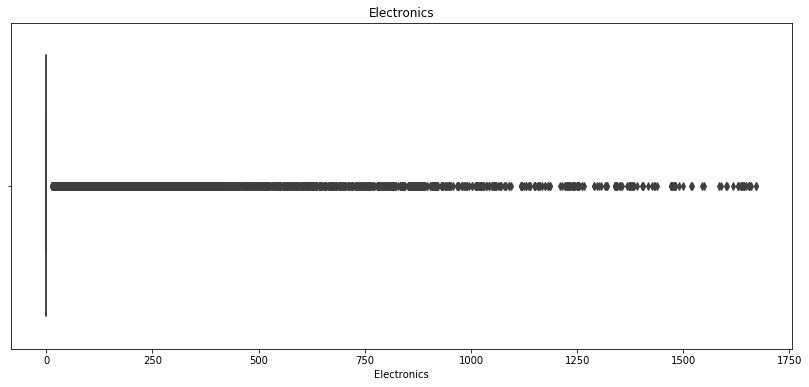

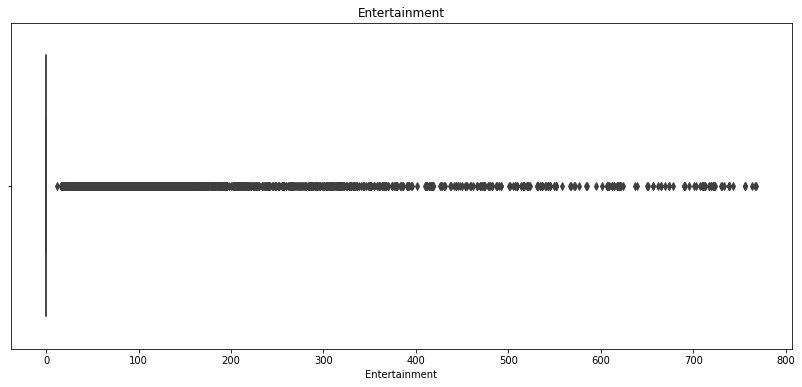

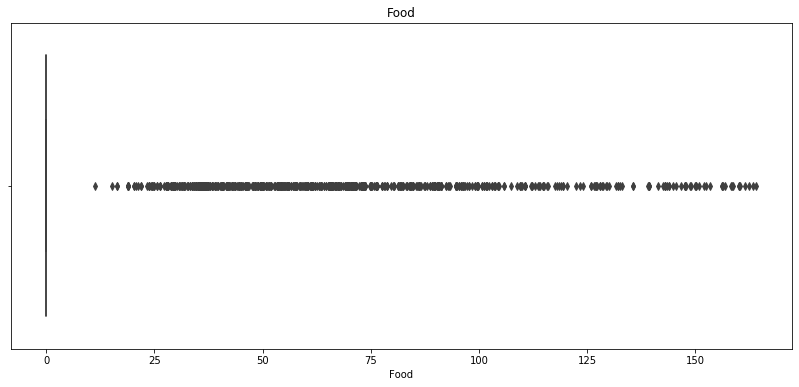

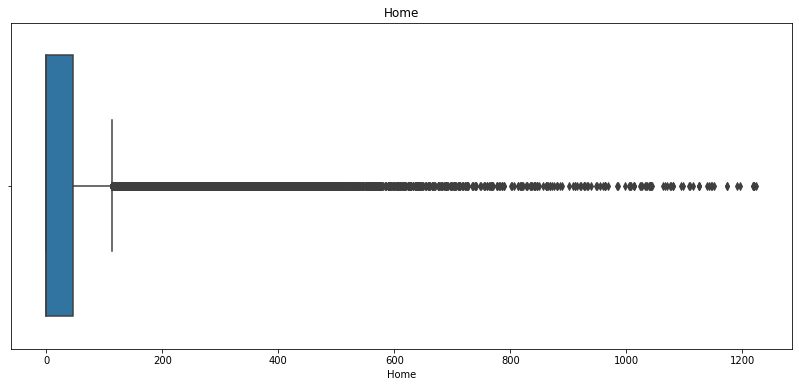

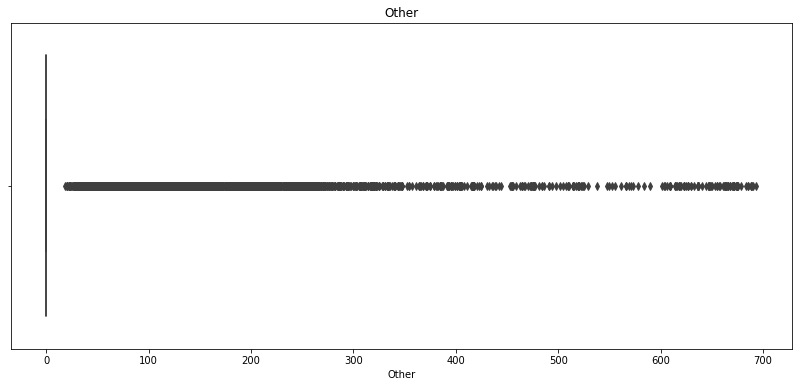

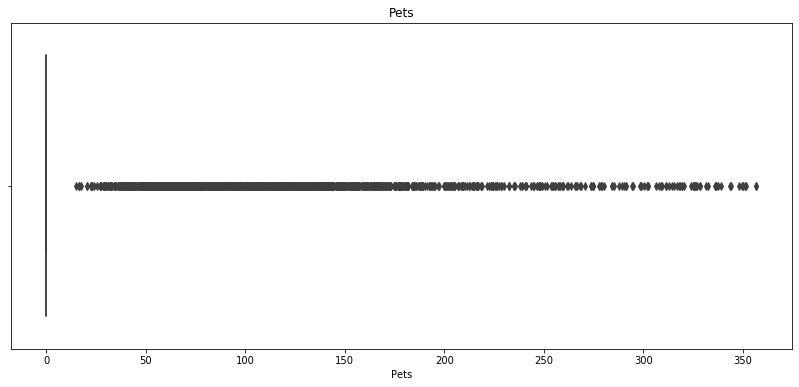

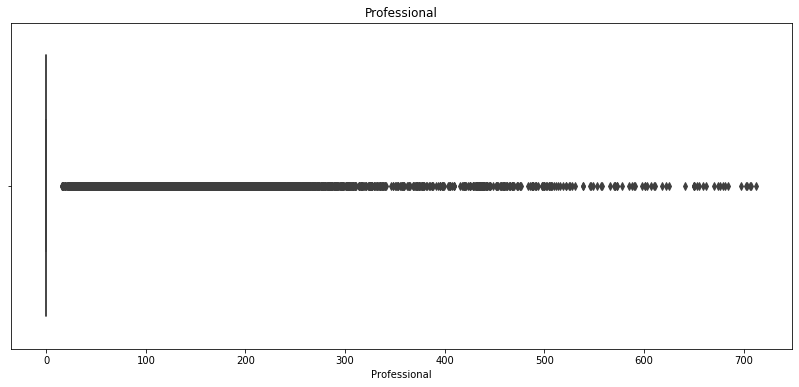

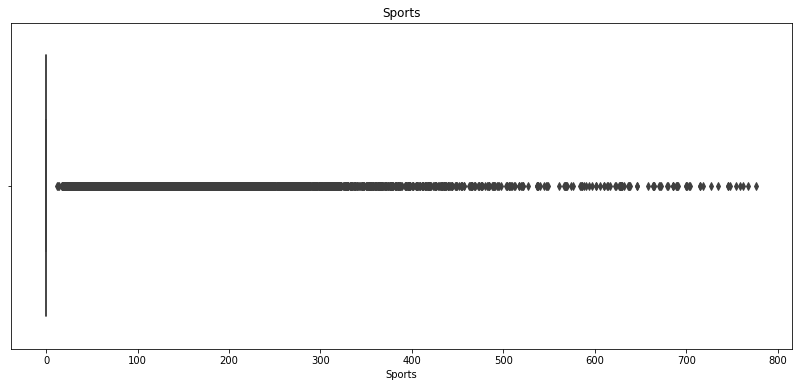

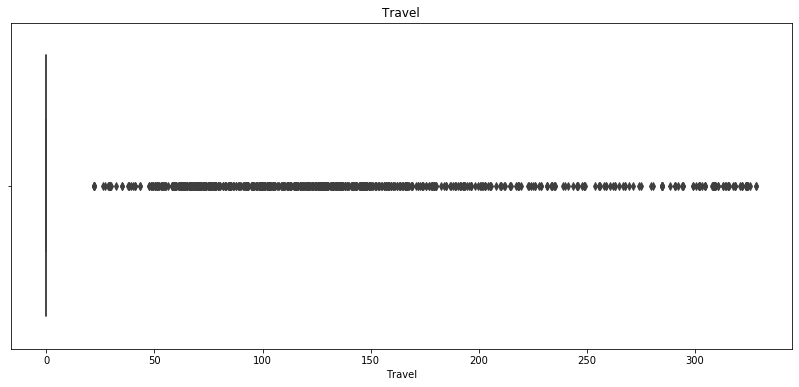

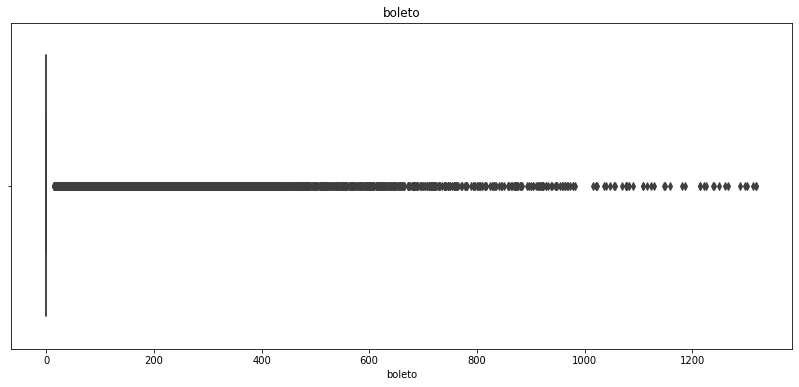

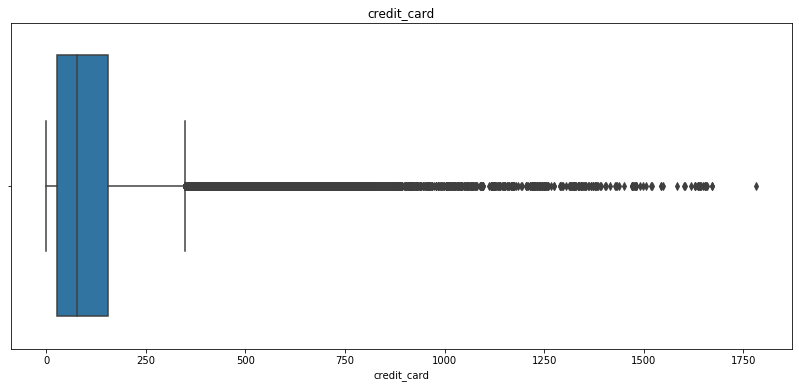

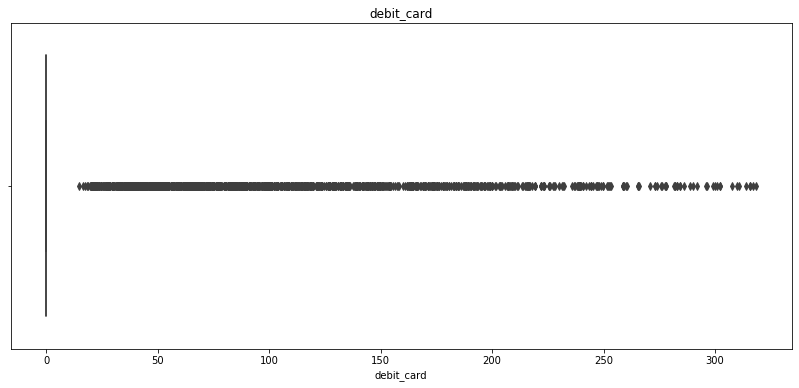

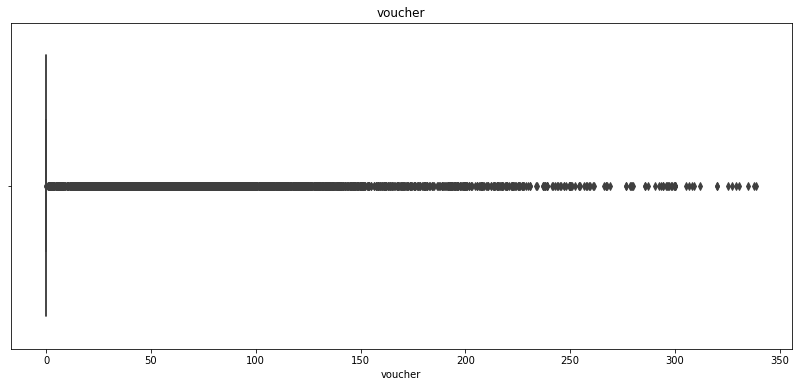

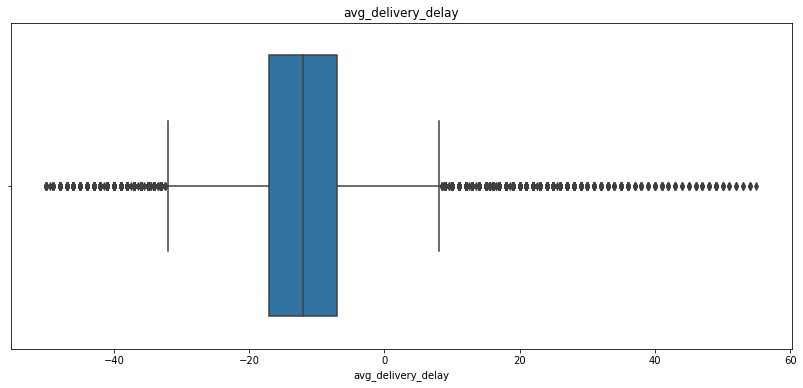

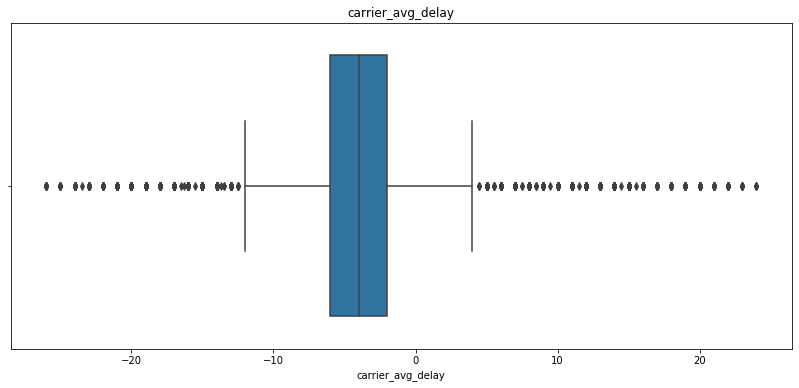

In [101]:
#Check boxplots for different columns

#Make list of numerical columns
num_cols = customer_base.select_dtypes([float, int]).columns

#Generate boxplot
for col in num_cols:
    sns.boxplot(customer_base[col])
    plt.title(col)
    plt.show()

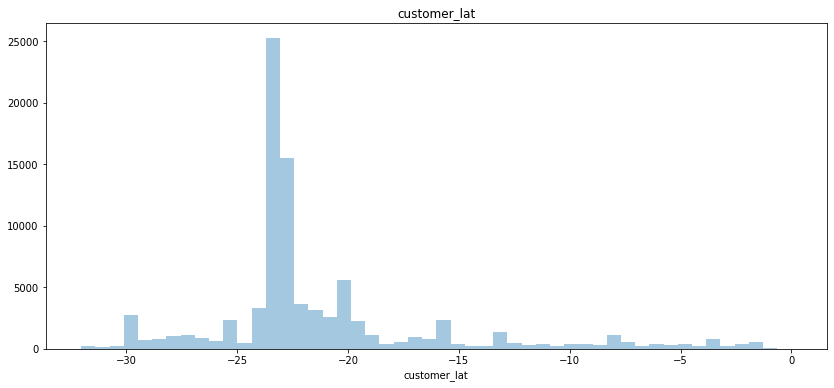

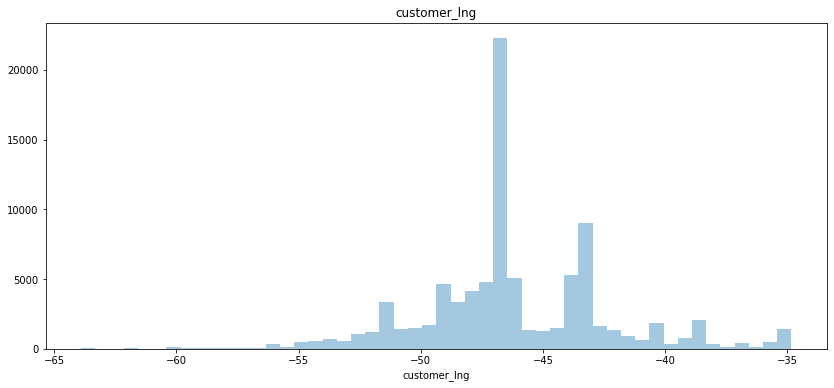

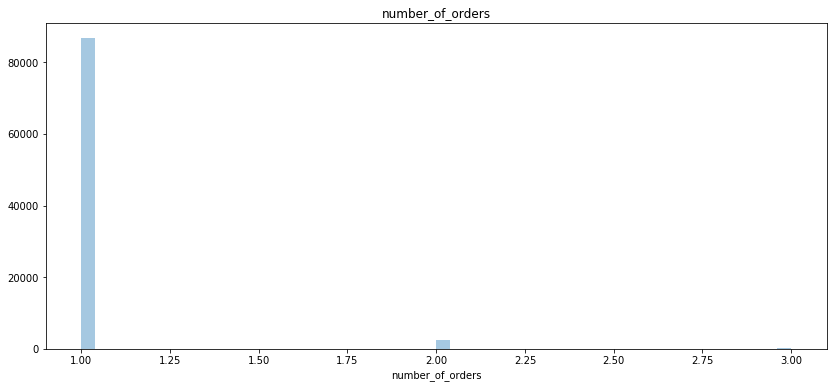

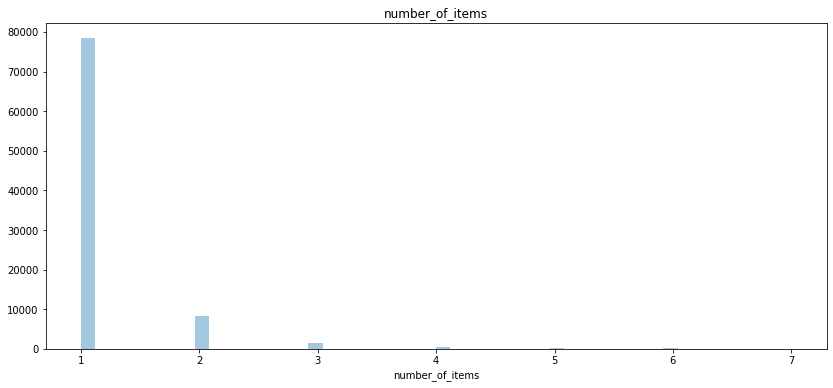

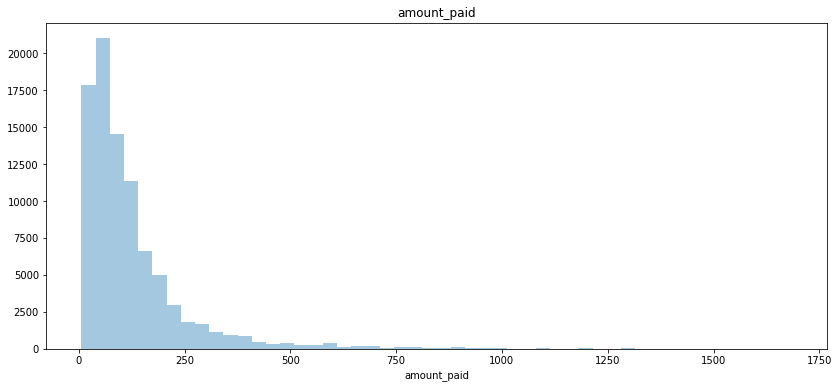

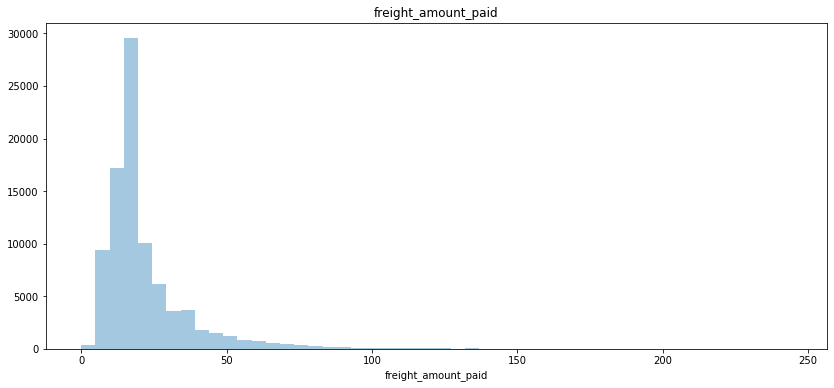

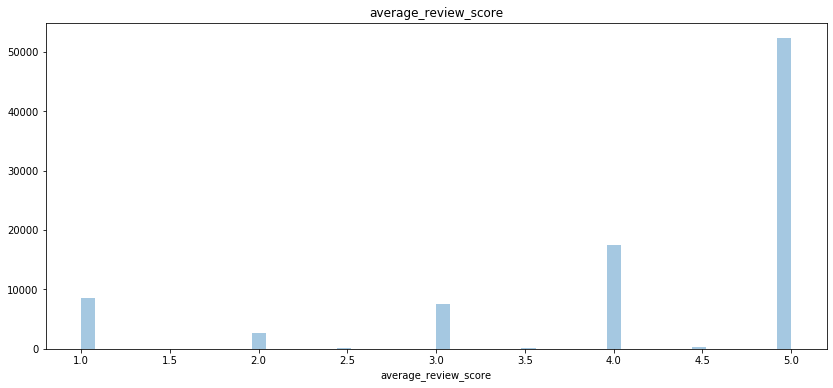

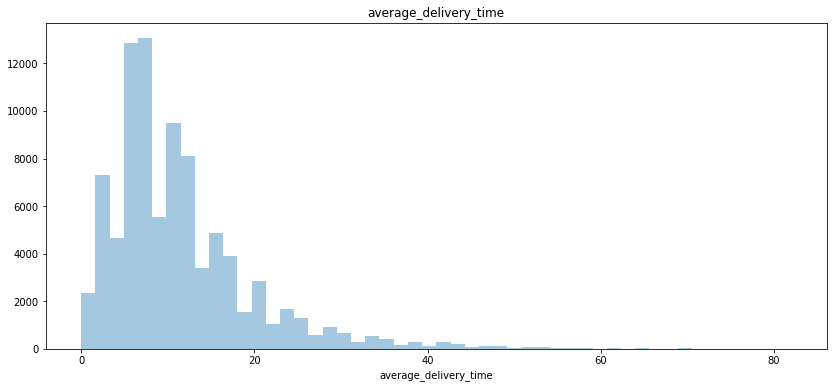

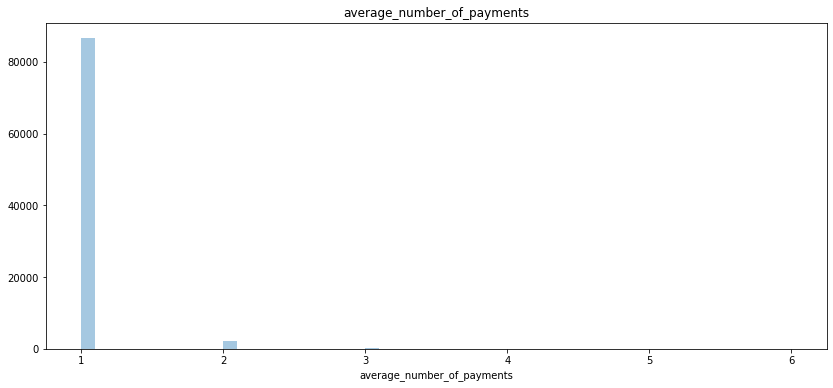

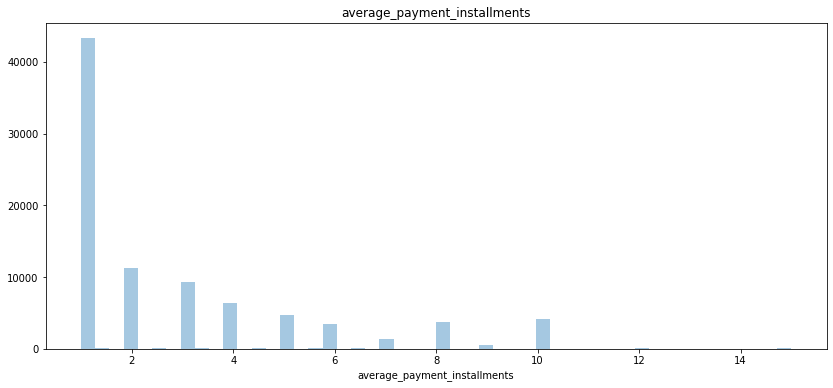

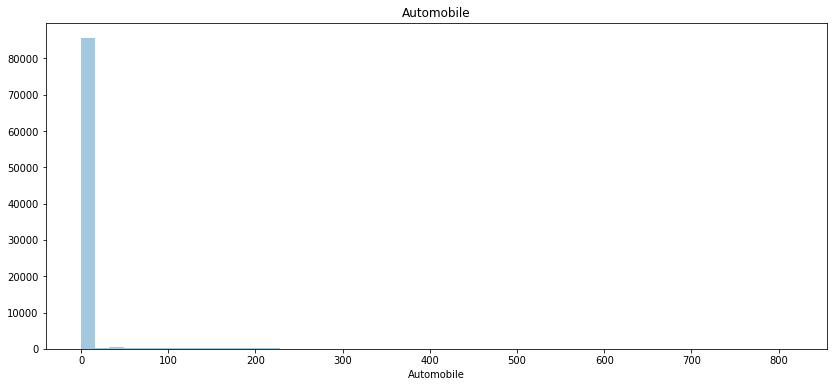

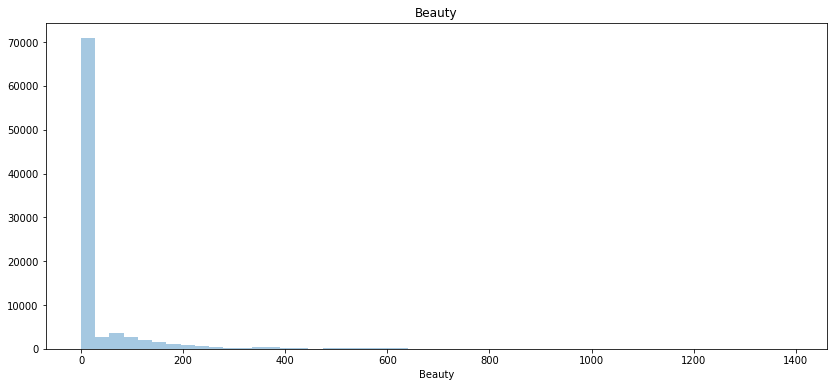

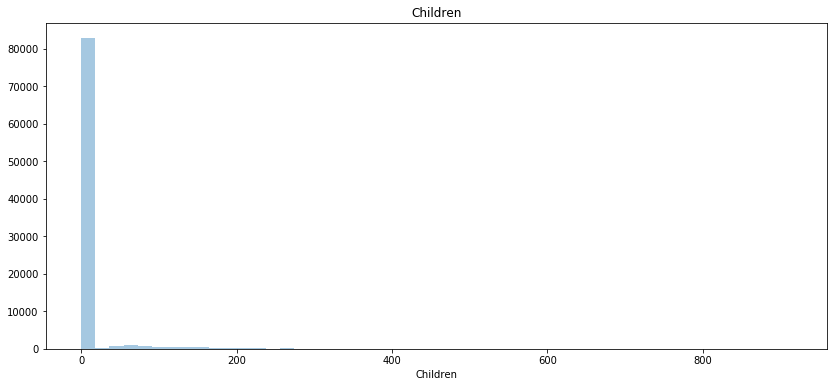

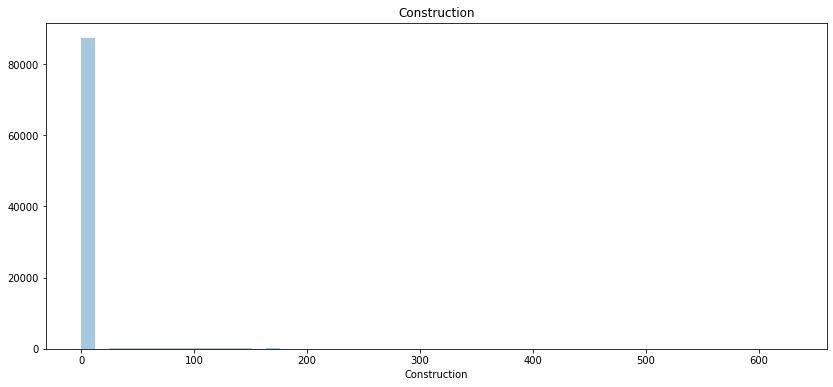

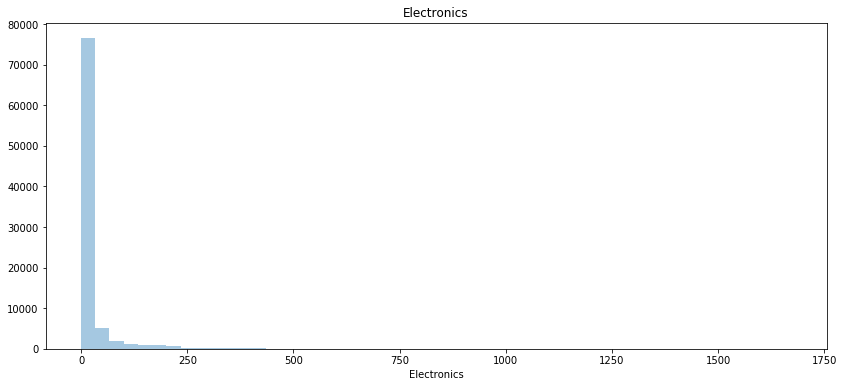

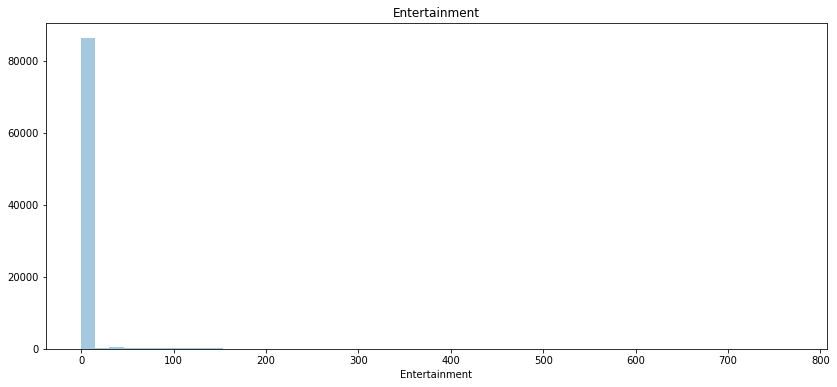

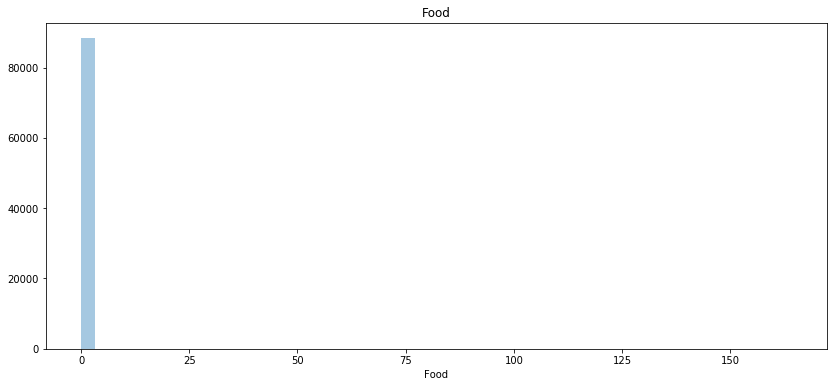

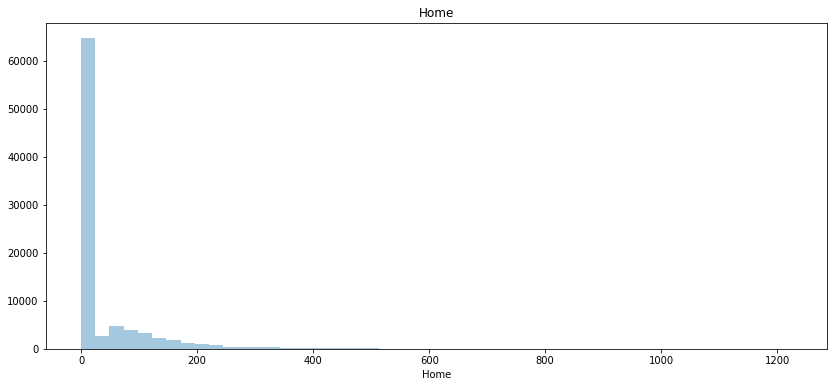

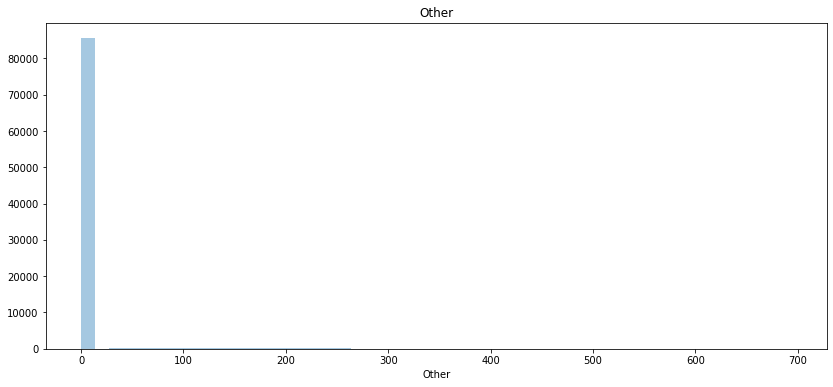

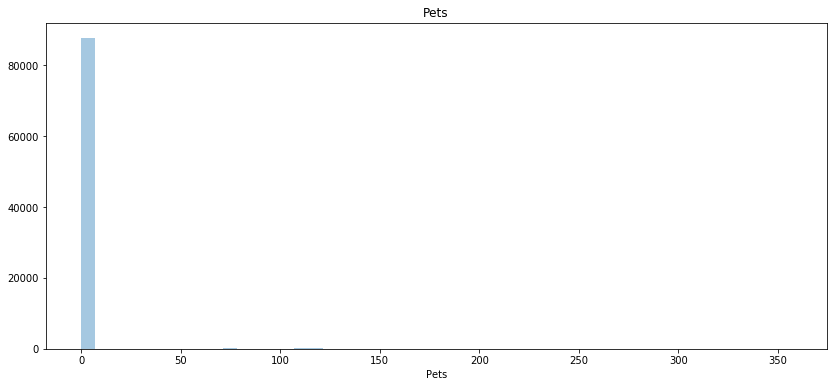

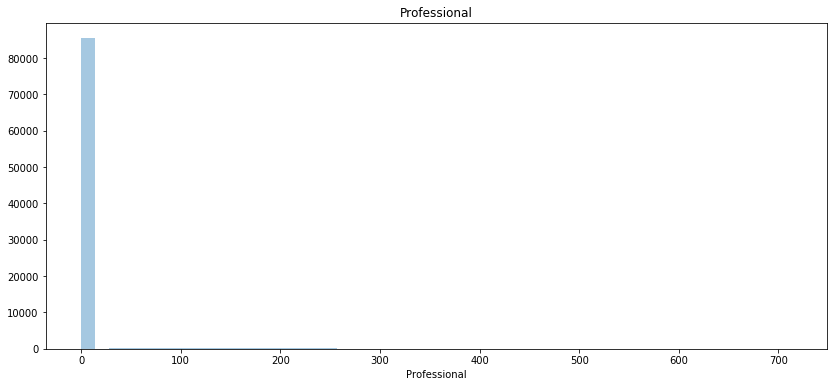

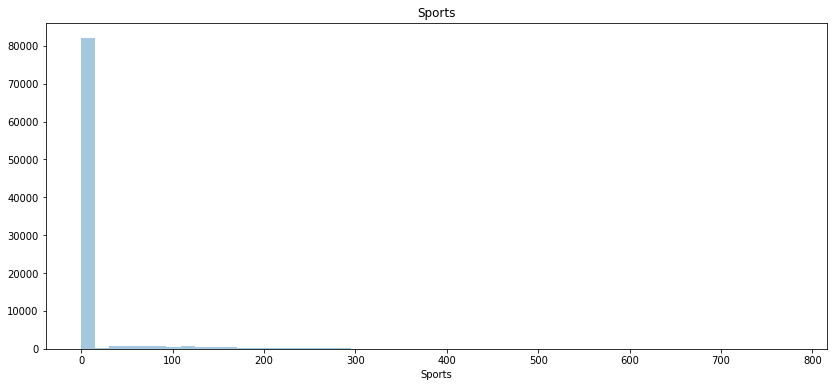

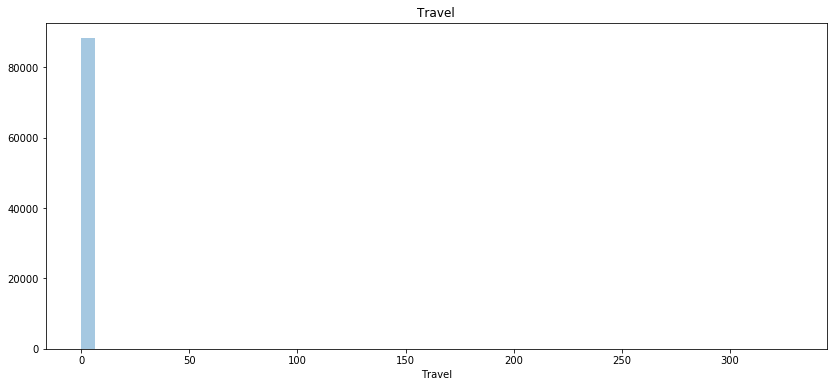

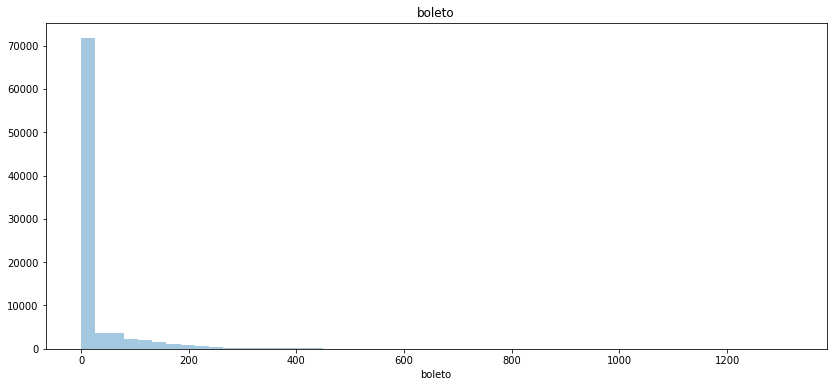

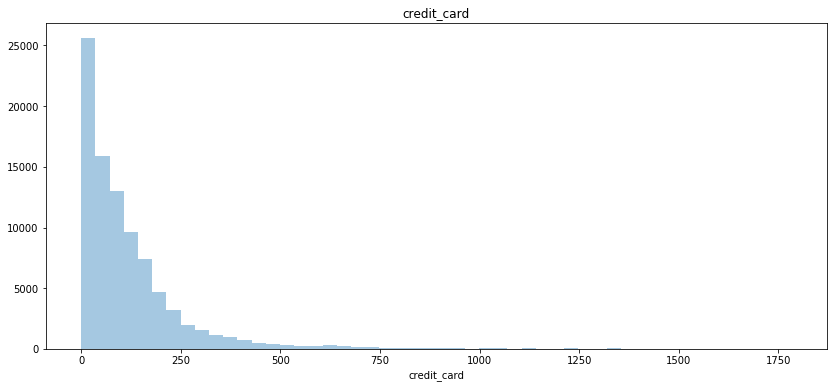

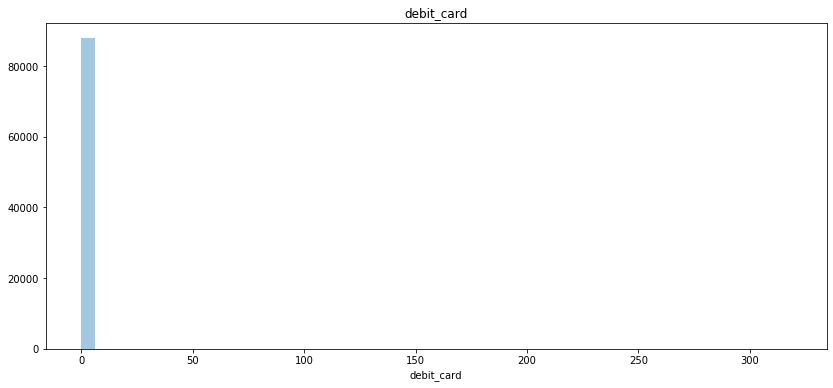

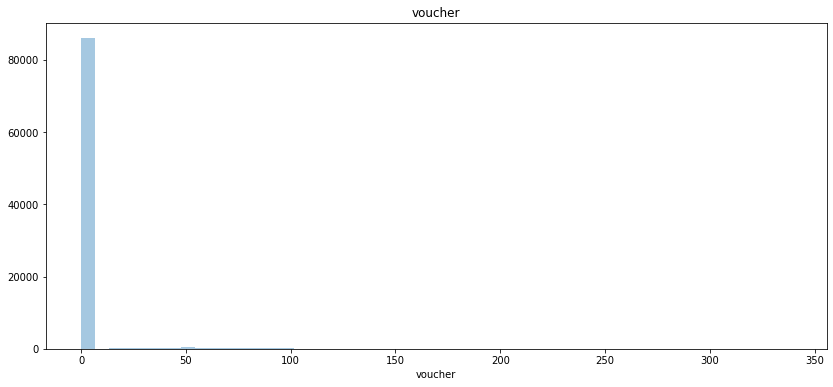

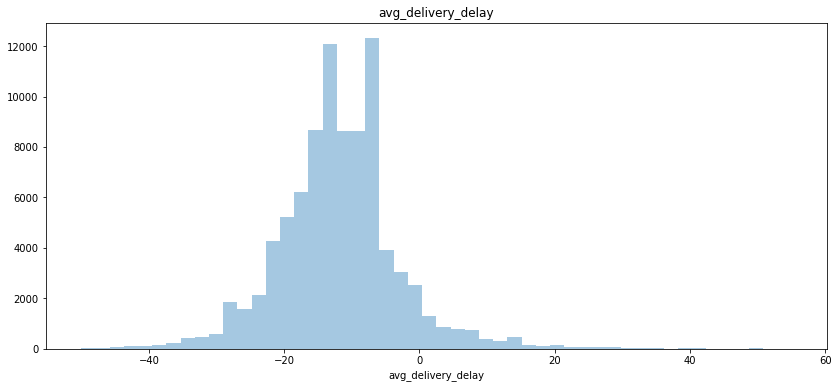

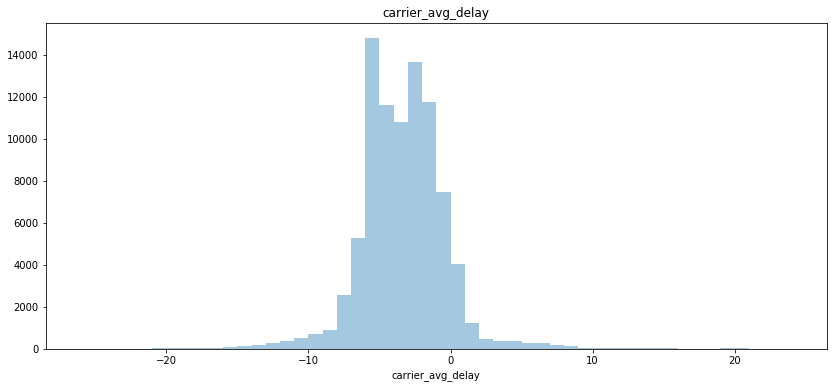

In [102]:
#Check distribution graphs for different columns

#Make list of numerical columns
num_cols = customer_base.select_dtypes([float, int]).columns

#Generate boxplot
for col in num_cols:
    sns.distplot(customer_base[col], kde = False)
    plt.title(col)
    plt.show()

## Exploration

In [103]:
customer_base

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,number_of_orders,number_of_items,amount_paid,freight_amount_paid,average_review_score,average_delivery_time,average_number_of_payments,average_payment_installments,Automobile,Beauty,Children,Construction,Electronics,Entertainment,Food,Home,Other,Pets,Professional,Sports,Travel,boleto,credit_card,debit_card,voucher,last_purchase_date,avg_delivery_delay,carrier_avg_delay,product_category_name_english,payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,-23.337679,-46.826739,1,1,129.90,12.00,5.0,6.0,1.0,8.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,141.9,0.0,0.0,0.00,0.0,0.0,0.00,141.90,0.0,0.0,2018-05-10 10:56:27,-5.0,-4.0,Home,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,-23.557876,-46.788754,1,1,18.90,8.29,4.0,2.0,1.0,1.0,0.00,27.19,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,27.19,0.0,0.0,2018-05-07 11:11:27,-5.0,-3.0,Beauty,credit_card
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,-27.543787,-48.631973,1,1,69.00,17.22,3.0,25.0,1.0,8.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,86.22,0.0,0.0,0.00,86.22,0.0,0.0,2017-03-10 21:05:03,-2.0,-3.0,Professional,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,-1.307764,-48.482884,1,1,25.99,17.63,4.0,20.0,1.0,4.0,0.00,0.00,0.00,0.0,43.62,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,43.62,0.0,0.0,2017-10-12 20:29:41,-12.0,-6.0,Electronics,credit_card
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,-23.506140,-47.470475,1,1,180.00,16.89,5.0,13.0,1.0,6.0,0.00,0.00,0.00,0.0,196.89,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,196.89,0.0,0.0,2017-11-14 19:45:42,-8.0,-7.0,Electronics,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91603,fffb09418989a0dbff854a28163e47c6,95330,veranopolis,RS,-28.936060,-51.549804,1,1,58.00,15.16,5.0,7.0,1.0,1.0,0.00,73.16,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,73.16,0.00,0.0,0.0,2017-12-17 19:14:35,-23.0,-7.0,Beauty,boleto
91605,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,-12.216776,-38.959754,1,1,64.89,19.69,4.0,30.0,1.0,1.0,0.00,0.00,84.58,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,84.58,0.0,0.0,2017-12-10 20:07:56,-3.0,6.0,Children,credit_card
91606,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,-11.835954,-55.508033,1,1,89.90,22.56,5.0,14.0,1.0,1.0,112.46,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,112.46,0.0,0.0,2017-02-07 15:49:16,-30.0,-4.0,Automobile,credit_card
91607,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,-21.126308,-41.674411,1,1,115.00,18.69,5.0,11.0,1.0,5.0,0.00,133.69,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,133.69,0.0,0.0,2018-05-02 15:17:41,-14.0,-5.0,Beauty,credit_card


In [104]:
customer_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89202 entries, 0 to 91608
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             89202 non-null  object        
 1   customer_zip_code_prefix       89202 non-null  object        
 2   customer_city                  89202 non-null  object        
 3   customer_state                 89202 non-null  object        
 4   customer_lat                   89202 non-null  float64       
 5   customer_lng                   89202 non-null  float64       
 6   number_of_orders               89202 non-null  int64         
 7   number_of_items                89202 non-null  int64         
 8   amount_paid                    89202 non-null  float64       
 9   freight_amount_paid            89202 non-null  float64       
 10  average_review_score           89202 non-null  float64       
 11  average_deliver

In [105]:
#Select Numerical columns
numerical_cols = customer_base.select_dtypes(exclude='object').columns

In [106]:
#Correlation values
corr = customer_base[numerical_cols].corr()

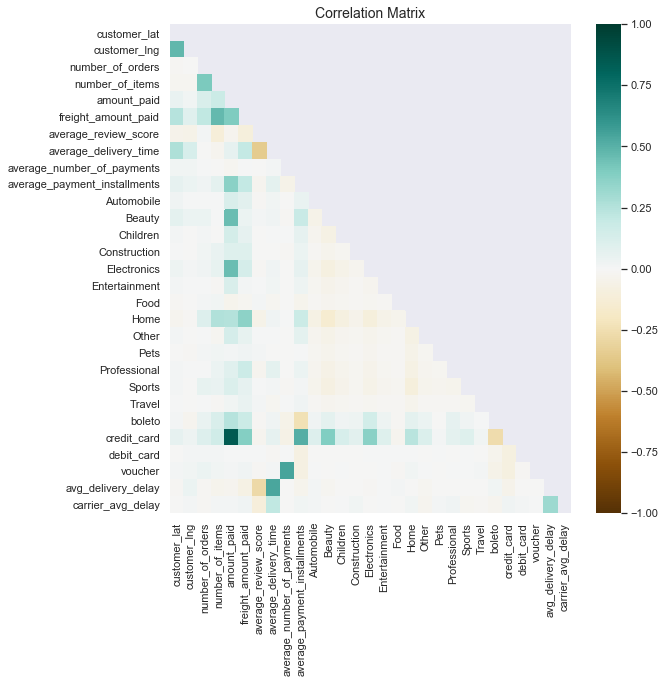

In [107]:
#Plot correlation matrix
plt.figure(figsize=(9,9))
sns.set(font_scale=1)
plt.title('Correlation Matrix', fontsize = 14)

mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = "BrBG", annot = False, mask = mask)

In [109]:
categories = ['Automobile', 
              'Beauty', 
              'Children',
              'Construction', 
              'Electronics', 
              'Entertainment', 
              'Food', 
              'Home', 
              'Other',
              'Pets', 
              'Professional', 
              'Sports', 
              'Travel']

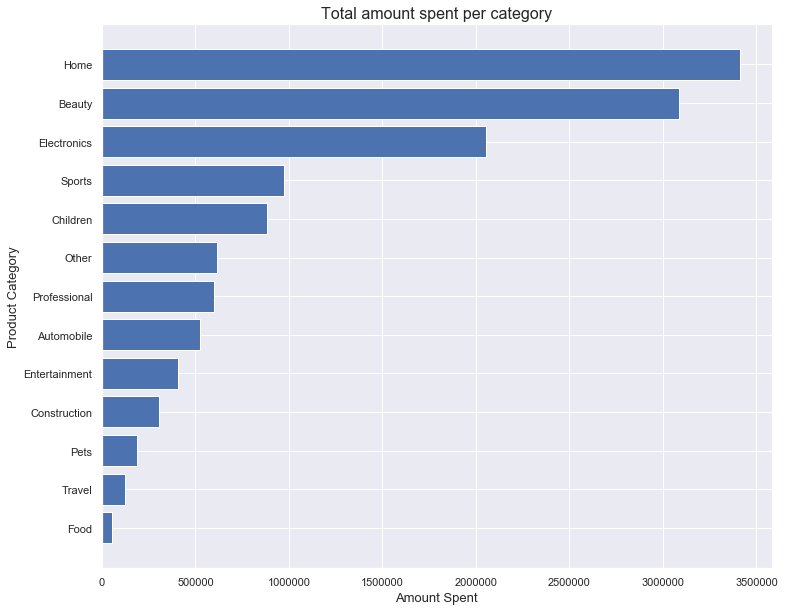

In [110]:
#Plot spending per category

#Make reduced dataset
cat_bar = customer_base.melt(value_vars = categories).groupby(by = 'variable').sum()
cat_bar = cat_bar.sort_values(by = 'value', ascending = True)

#Plot
fig, ax = plt.subplots(figsize = (12,10))
plt.barh(y = cat_bar.index, width = cat_bar['value'])
plt.title("Total amount spent per category", fontsize = 16)
plt.xlabel("Amount Spent", fontsize = 13)
plt.ylabel("Product Category", fontsize = 13)
plt.show()

In [114]:
pie_data = customer_base['number_of_orders'].value_counts() / len(customer_base)

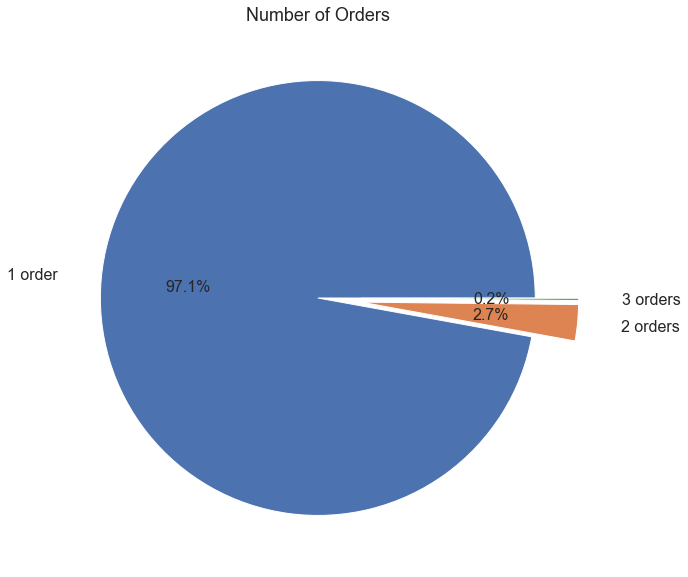

In [116]:
#Pie chart of number of total orders placed by each customer

explode = (0, 0.2, 0.2)
fig, ax = plt.subplots(figsize = (12,10))
plt.pie(x = pie_data, 
        labels = ['1 order', '2 orders', '3 orders'], 
        autopct='%1.1f%%', 
        startangle = 0, 
        labeldistance = 1.2, 
        explode = explode,
        textprops={'fontsize': 16})
plt.title('Number of Orders', fontsize = 18)
plt.show()

### Export dataset to CSV

In [117]:
#Remove Customer State and City as they are made redundant by the presence of latitude and longitude
customer_base.drop(columns = ['customer_zip_code_prefix', 'customer_city', 'customer_state'], inplace = True)

In [118]:
#Export file for modeling
customer_base.to_csv(f'project_cluster_input.csv')